In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import squarify
import seaborn as sns # sns is an alias for seaborn library which is used for visualization purpose
import matplotlib.pyplot as plt #base library for visualization
from sklearn.preprocessing import LabelEncoder #library used for label encoding
from sklearn.model_selection import train_test_split #sciskit learn is the library for all model building activities
from sklearn.linear_model import LogisticRegression

In [4]:
data = sns.load_dataset("titanic") #Calling the inbuilt data set from the seaborn library

In [7]:
data[data['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [11]:
#Survival rate 
(342/891) * 100

38.38383838383838

In [15]:
survival_rate = data['survived'].mean()*100
survival_rate

38.38383838383838

In [17]:
#survival rate by pclass
data.groupby('pclass')['survived'].mean()*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [21]:
data[(data['pclass']==3) & (data['survived']==1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
858,1,3,female,24.0,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,yes,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [23]:
data.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [25]:
#Number of survivers in pclass 3 / total number of passengers in pclass 3 = (119/491)*100 = survival rate of pclass3 in percentage

24.236252545824847

In [29]:
#The proportion of pclass3 passengers = 

491/(491+216+184) * 100

55.106621773288445

In [33]:
#The proportion of pclass2 passengers = 

184/(491+216+184) * 100

20.65095398428732

In [31]:
#The proportion of pclass1 passengers = 

216/(491+216+184) * 100

24.242424242424242

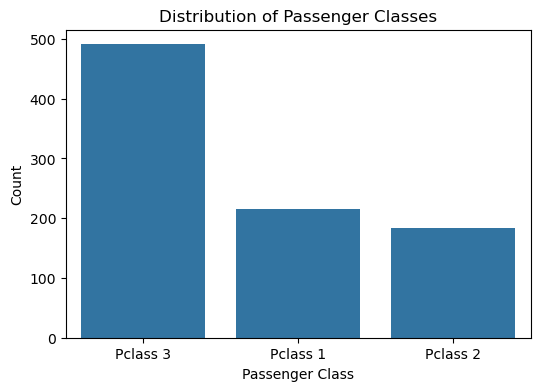

In [35]:
# More than half of the dataset belongs to pclass3 and the distribution is not balanced
pclass_counts = [491, 216, 184]
pclass_labels = ["Pclass 3", "Pclass 1", "Pclass 2"]

plt.figure(figsize=(6,4))
sns.barplot(x=pclass_labels, y=pclass_counts)
plt.title("Distribution of Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [37]:
#To check skewness
from scipy.stats import skew
pclass_values = [3] * 491 + [1] * 216 + [2] * 184
skewness = skew(pclass_values)
print(f"Skewness Score: {skewness}")

Skewness Score: -0.6294858816096937


If skewness is greater than 0.5 then right skewed if skewness less than -0.5 then left skewed if skewness close to 0 then symmetric

In [39]:
# no of people who survived in pclass 1 / total number of people in pclass 1 =
data[(data['pclass']==1) & (data['survived']==1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [43]:
(136/216) * 100 # Survival rate of pclass 1 in percentage

62.96296296296296

In [45]:
data[(data['pclass']==2) & (data['survived']==1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
21,1,2,male,34.00,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
865,1,2,female,42.00,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
866,1,2,female,27.00,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28.00,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False


In [47]:
(87/184) * 100 # Survival rate of pclass 2 in percentage

47.28260869565217

Survival rate of pclass1 in percentage: 62.9
Survival rate of pclass2 in percentage: 47.28
Survival rate of pclass3 in percentage: 24.23
pclass1 passengers has the highest survival rate and pclass3 are at the highest risk. This interprets that the skewed distribution is actually dominating the dataset for survival percentage in pclass3 which means there can be biased survival predictions if the data imbalance is not handled properly.

([<matplotlib.axis.XTick at 0x1bf76686240>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

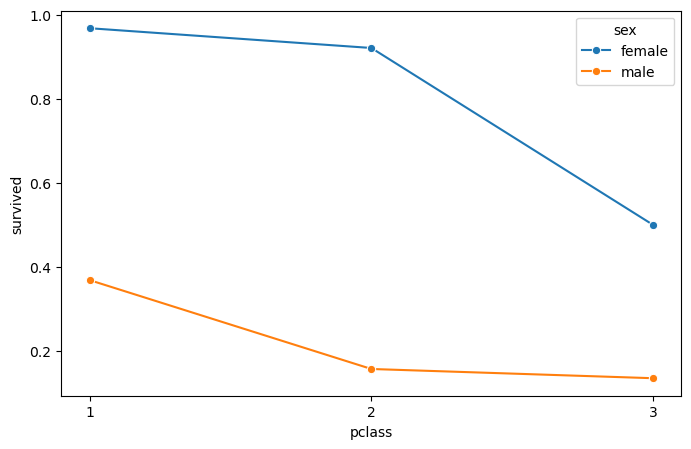

In [61]:
survival_by_class_gender = data.groupby(['pclass', 'sex'])['survived'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x="pclass", y="survived", hue="sex", data=survival_by_class_gender, marker="o", linestyle="-")
plt.xticks([1,2,3])

Survival Proportion by Pclass:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


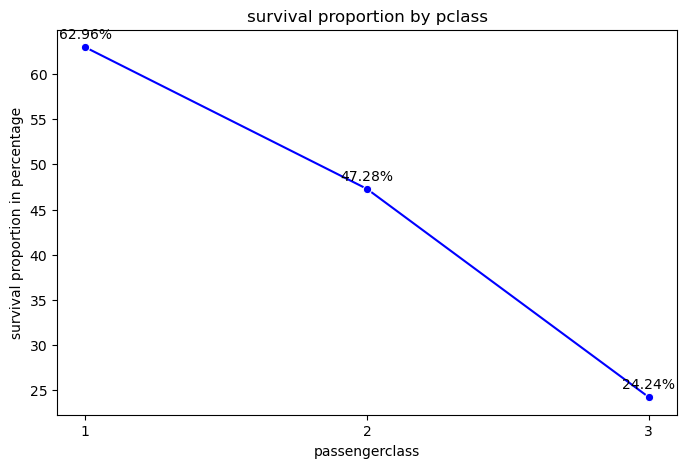

In [63]:
survival_by_class = data.groupby("pclass")["survived"].mean() * 100
print("Survival Proportion by Pclass:")
print(survival_by_class)
plt.figure(figsize=(8,5))
sns.lineplot(x=survival_by_class.index, y=survival_by_class.values, marker="o", linestyle="-", color="b")
plt.xlabel('passengerclass')
plt.ylabel('survival proportion in percentage')
plt.title('survival proportion by pclass')
plt.xticks([1,2,3])

for i, txt in enumerate(survival_by_class.values):
    plt.text(survival_by_class.index[i], txt + 1, f"{txt:.2f}%", ha='center')

plt.show()

In [67]:
data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [65]:
data.embark_town.value_counts()
# It shows the frequency of each unique category within that particular column in descending order of frequency, it does not reflect missing values

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [59]:
data.columns
# survived: NumericaL Categorical
# pclass:   Numerical Categorical
# sex:      String categorical
# age:      Numeric continuous
# sibsp:    Numeric categorical
# parch     Numeric categorical
# fare      Numeric continuous
# embarked  String categorical
# class     String categorical
# who       String categorical
# adult_male String Categorical
# deck       String categorical
# embark_town String categorical
# alive       String categorical
# alone       String categorical

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

age : count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


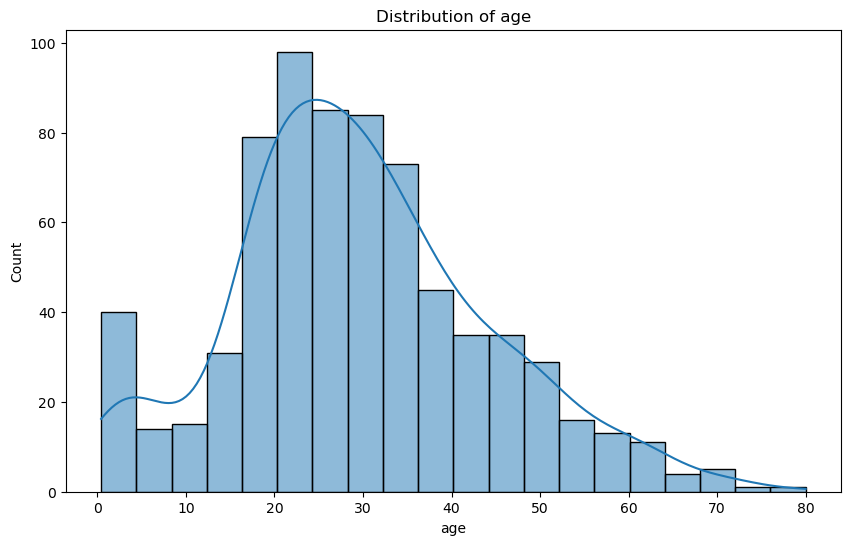

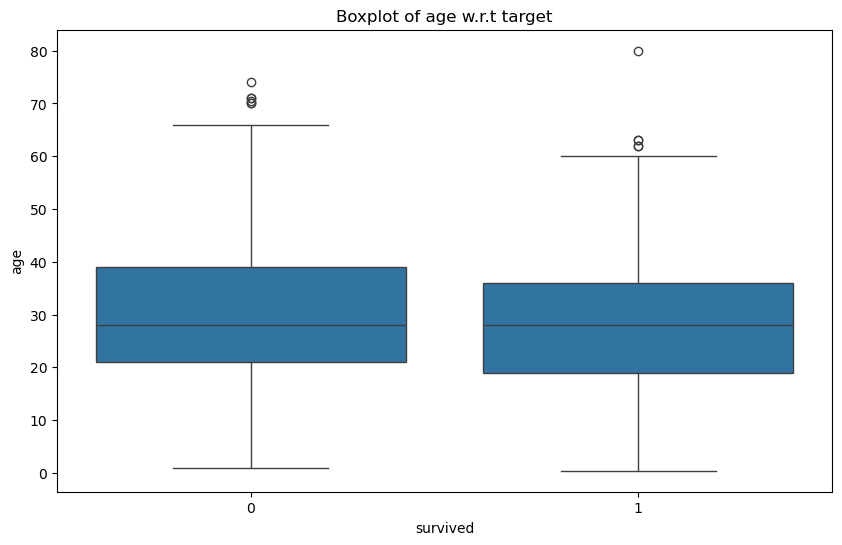

fare : count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


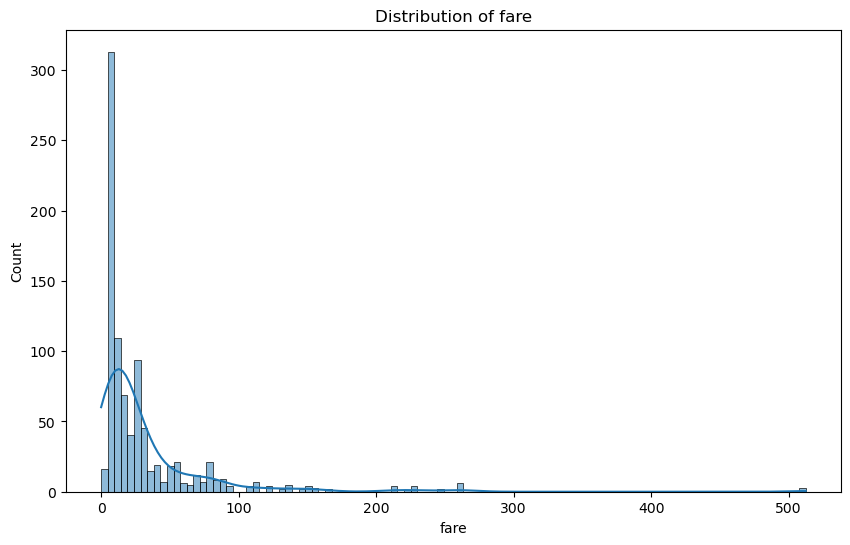

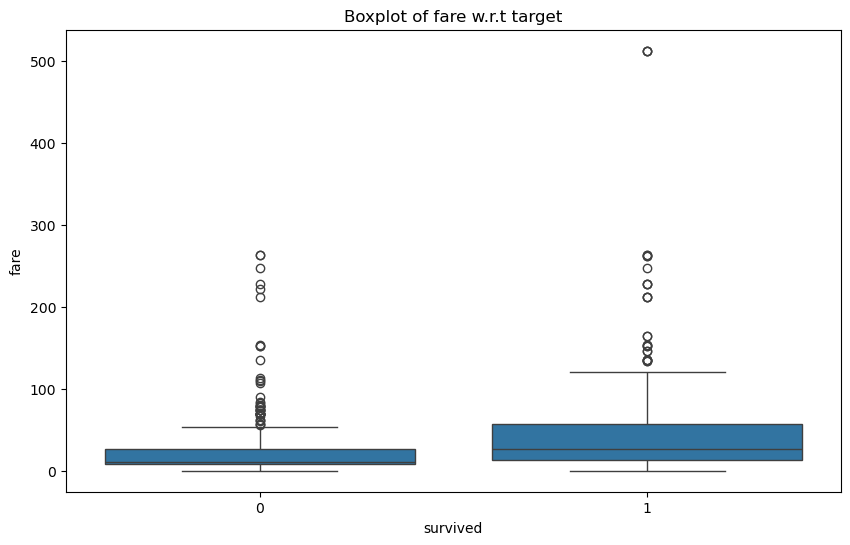

In [57]:
continuous_col = []

for column in data.columns:
    if data[column].dtype != object and len(data[column].unique()) > 10:
        continuous_col.append(column)
        print(f"{column} : {data[column].describe()}")
        print("====================================")
        
        # Plotting the histogram for each continuous column
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
        
        # Plotting the boxplot for each continuous column
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=data[column],x=data['survived'])
        plt.title(f'Boxplot of {column} w.r.t target')
        plt.show()

In [55]:
continuous_col

['age', 'fare']

In [17]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in data.columns: #Iterates through each column in the DataFrame.
    #if data[column].dtype==object and len(data[column].unique()) <= 20
    if len(data[column].unique()) <= 20: #Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 20 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {data[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {data[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
categorical_col
# #The purpose of this code is to help you identify and inspect
# categorical columns in your DataFrame, particularly those with a
# manageable number of unique categories. This information is useful for
# data exploration and analysis, especially when you need to decide how
# to handle categorical variables in machine learning or data analysis
# tasks.

survived : [0 1]
survived : survived
0    549
1    342
Name: count, dtype: int64
pclass : [3 1 2]
pclass : pclass
3    491
1    216
2    184
Name: count, dtype: int64
sex : ['male' 'female']
sex : sex
male      577
female    314
Name: count, dtype: int64
sibsp : [1 0 3 4 2 5 8]
sibsp : sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
parch : [0 1 2 5 3 4 6]
parch : parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
embarked : ['S' 'C' 'Q' nan]
embarked : embarked
S    644
C    168
Q     77
Name: count, dtype: int64
class : ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
class : class
Third     491
First     216
Second    184
Name: count, dtype: int64
who : ['man' 'woman' 'child']
who : who
man      537
woman    271
child     83
Name: count, dtype: int64
adult_male : [ True False]
adult_male : adult_male
True     537
False    354
Name: count, dtype: int64
deck : [N

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [13]:
 categorical_col

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [31]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Create a pie chart of all categorical columns (by defining a function) to find their percentage distribution within the titanic dataset
def pie_chart(data,col): #any categorical can be used
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts()*100/len(data[col])).values)
        fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
        fig.show()

In [19]:
def pie_chart(data, categorical_cols):
    for col in categorical_cols:
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts() * 100 / len(data[col])).values)
        
        fig = px.pie(values=values, 
                     names=targets, 
                     color_discrete_sequence=['darkcyan', 'lawngreen'], 
                     title=col)
        fig.show()

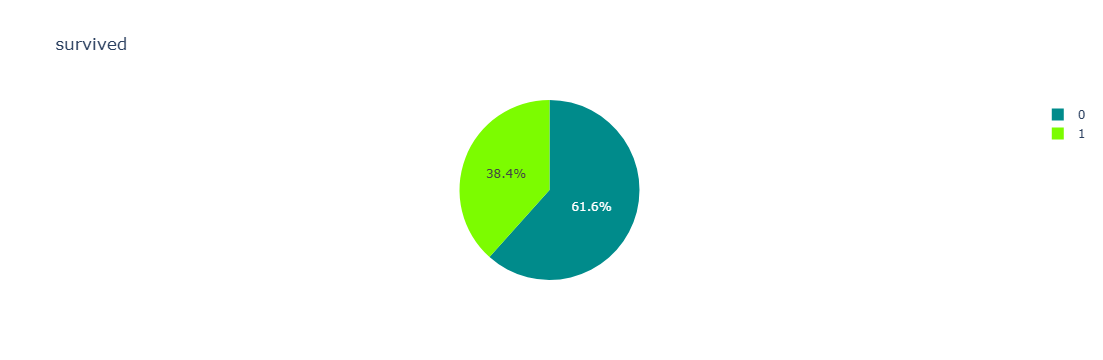

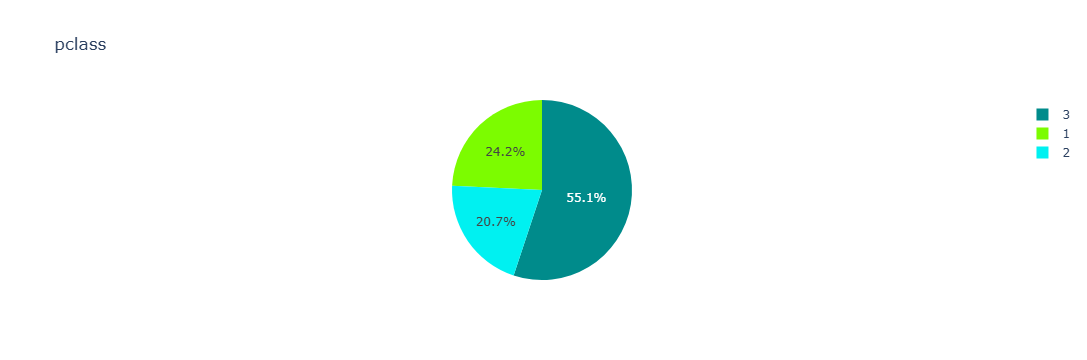

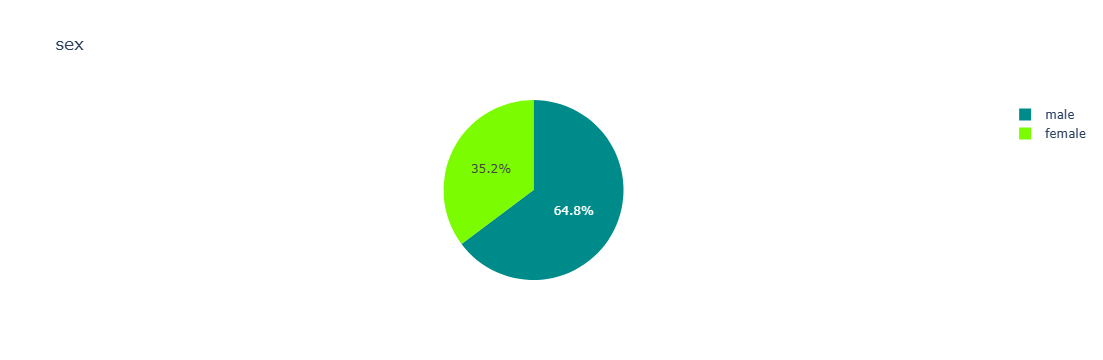

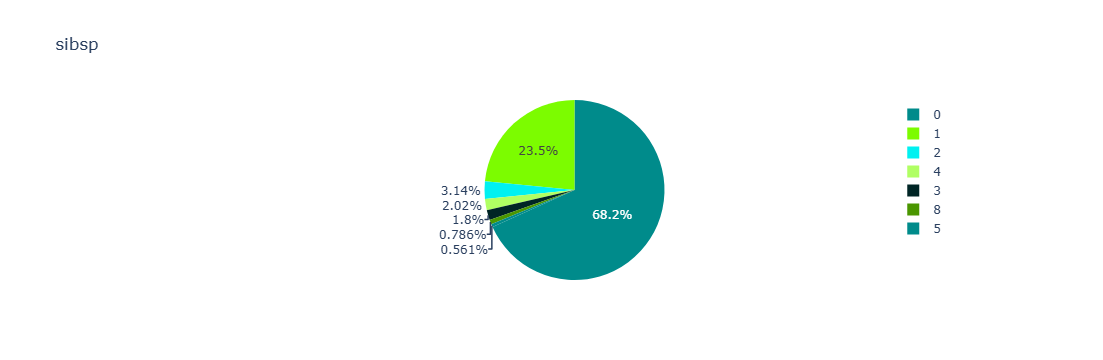

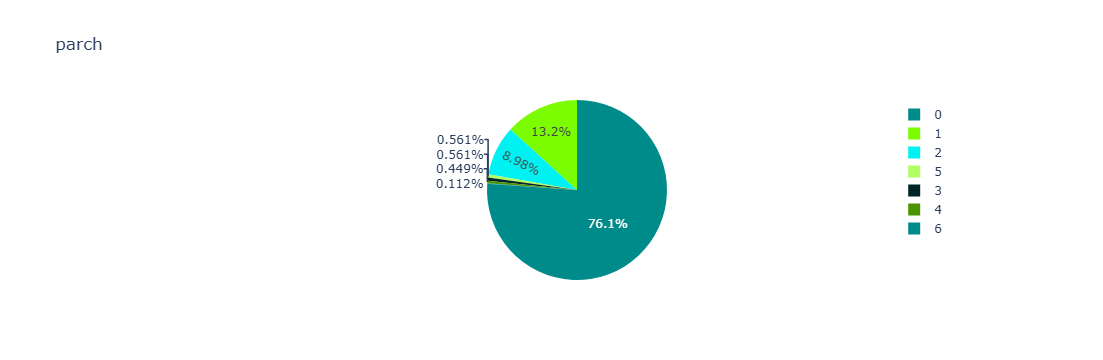

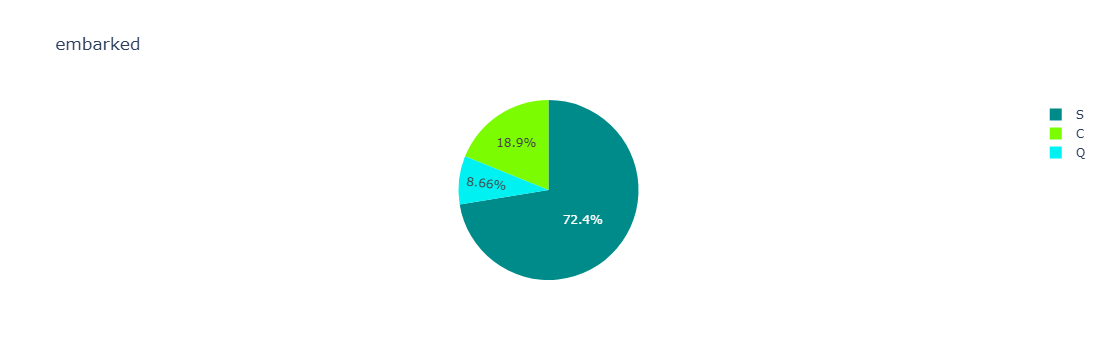

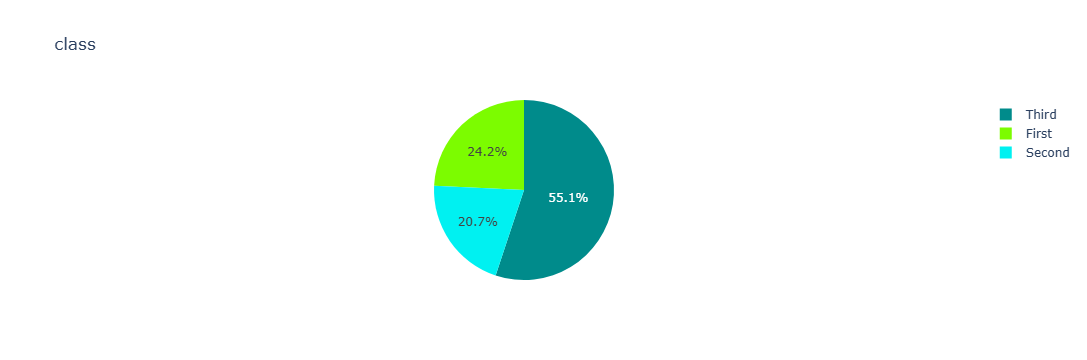

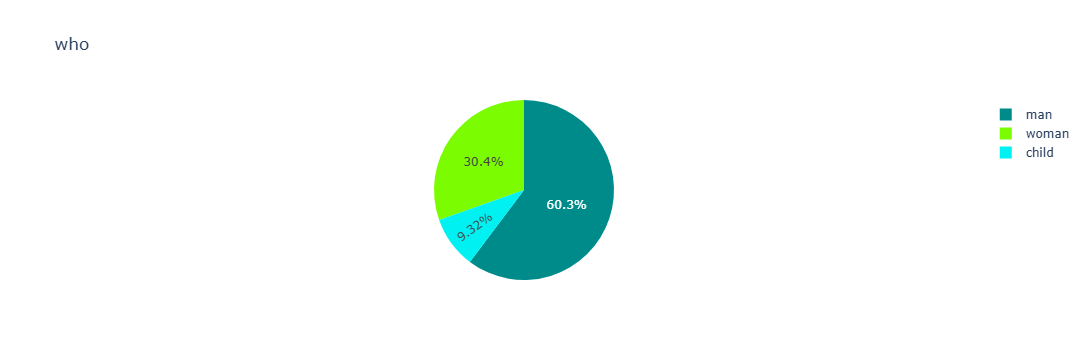

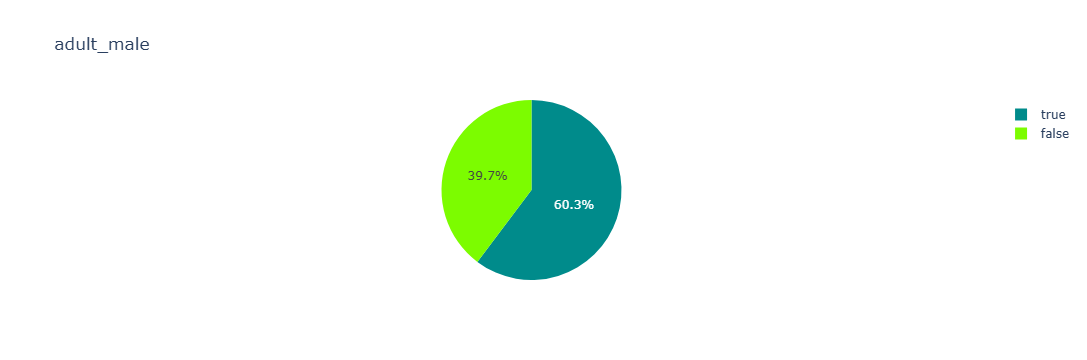

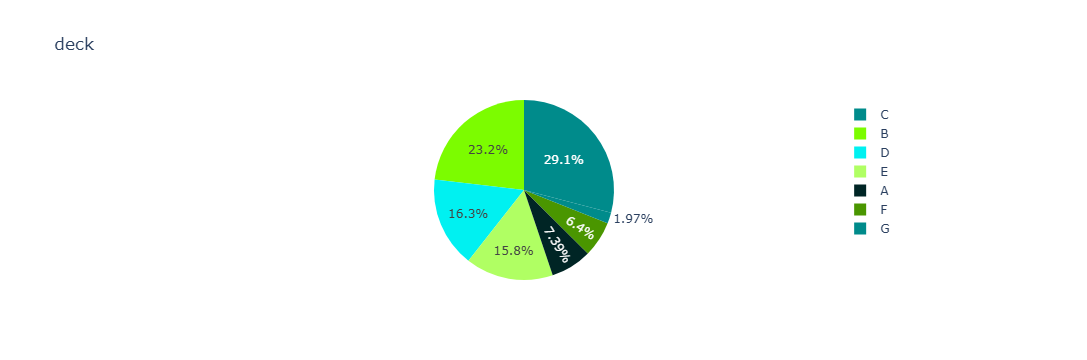

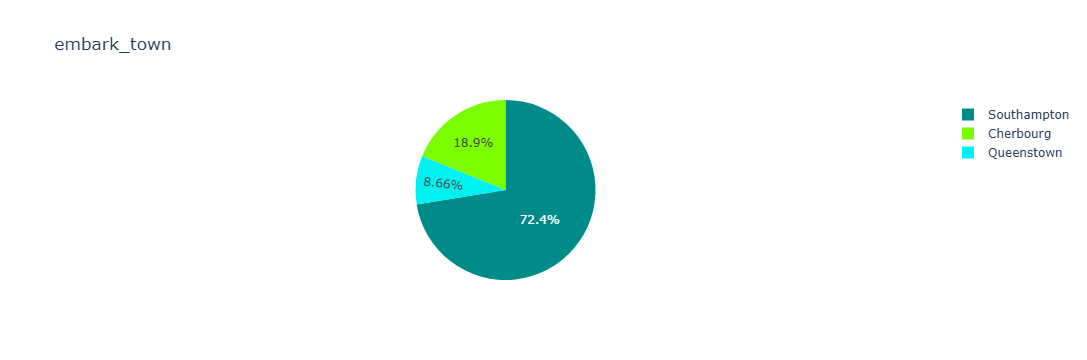

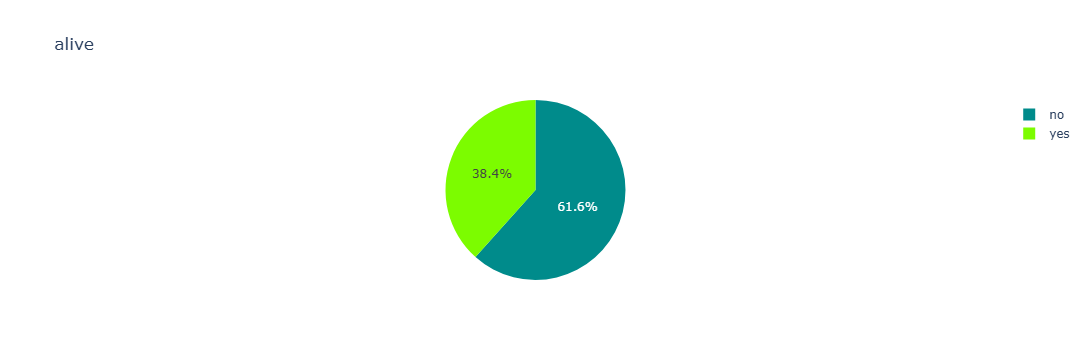

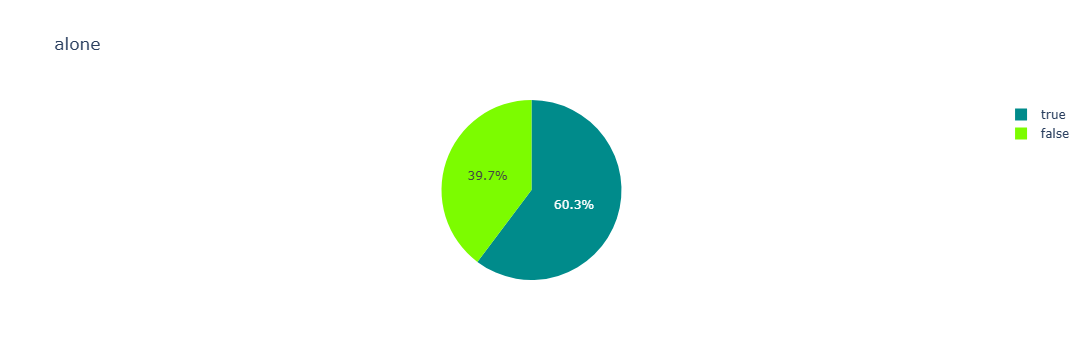

In [21]:
pie_chart(data,categorical_col)

In [25]:
oldest_survivor = data[data['survived'] == 1].sort_values(by='age', ascending=False).iloc[0]
oldest_survivor # oldest surviving passenger in the ship

survived                 1
pclass                   1
sex                   male
age                   80.0
sibsp                    0
parch                    0
fare                  30.0
embarked                 S
class                First
who                    man
adult_male            True
deck                     A
embark_town    Southampton
alive                  yes
alone                 True
Name: 630, dtype: object

In [31]:
#Top 3 oldest surviving passengers
top3_oldest_survivor = data[data['survived'] == 1].sort_values(by='age', ascending=False).head(3)
top3_oldest_survivor


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True


In [33]:
data['family_size']= data['sibsp']+data['parch'] + 1
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [37]:
cols = data.columns.tolist()
cols

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'family_size']

In [39]:
cols.insert(1, cols.pop(cols.index("family_size")))

In [41]:
cols

['survived',
 'family_size',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [45]:
data = data[cols]

In [47]:
data

,survived,family_size,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,2,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,2,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,2,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,1,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,4,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
data.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# To show the summary statistics for string columns

In [29]:
data.describe(include=object)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [33]:
data.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [35]:
data.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [41]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [39]:
data[data['who']=='child']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.00,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [23]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
177+714

891

In [302]:
data.to_excel("output.xlsx", index=False)

In [303]:
#To find out the distinct values of survived column
data.survived.value_counts() #value_counts() for finding distinct values of the column (in case mentioned), and of the entire dataset (in case no particular column is mentioned)

survived
0    549
1    342
Name: count, dtype: int64

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [305]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [306]:
data.shape

(891, 15)

In [307]:
#To find out the number of missing values of each column in the entire dataset
data.isnull().sum() #data.age.isnull().sum() for checking values of each column or data['age'].isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

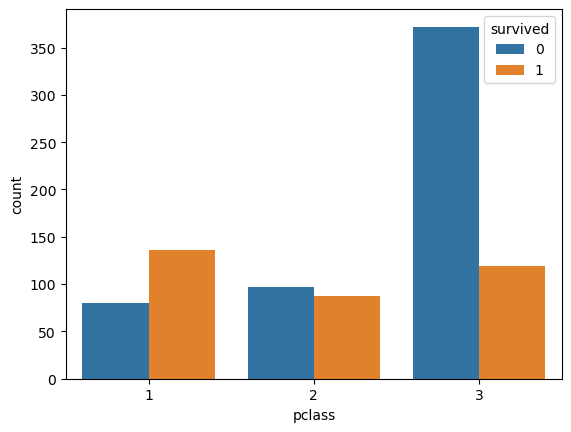

In [308]:
#To check the relationship between pclass and survived. #Both pclass and survived are catgorical in nature, so we will do a count plot to provide the visualization of 2 categorical variables
sns.countplot(x='pclass', hue = 'survived', data=data)

In [309]:
#Method 2 for finding out the relationship between 2 categorical variables. pclass and survived
pclass_survived_crosstab = pd.crosstab(data['pclass'], data['survived'], margins=True)
print(pclass_survived_crosstab)

survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


In [310]:
data 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [311]:
data1 = data[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']] #extracting the numeric columns of the dataset data and storing in data1 inorder to do the heatmap based on the extracted numeric columns

In [312]:
#Heat-map to show the correlation between numerical features in the dataset
corr = data.corr(numeric_only=True) # or data1.corr()
corr
#Heat-map could not be computed now on data because we have string columns in the dataset so we need to do encoding (converting string columns to numeric) and then heat map (visualization based on correlation matrix which includes correlation between each of the variables in the dataset) can be obtained

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


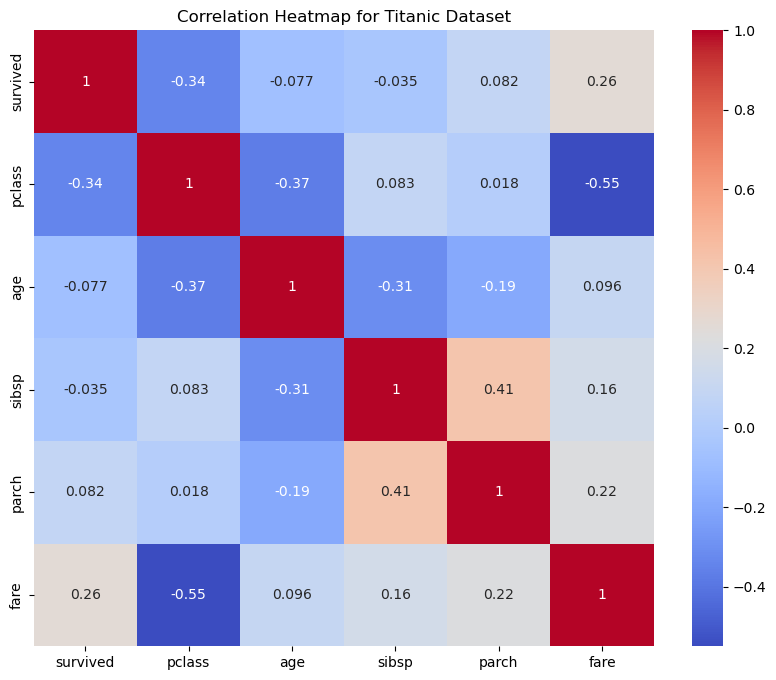

In [313]:
#plotting the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Titanic Dataset')
plt.show()
# The heat map can be used to check the correlation for numeric data
# As the pclass increases, survival decreases as can be seen in the heatmap, they are negatively correlated.
# As the age increases, survival decreases as can be seen in the heatmap, they are negatively correlated.
# As sibling /spouse increases, survival decreases
# Do the count plot of sibsp with survived and parch with survived, to have an insight regarding sibsp and parch being insignificant or not for the target survived 

<Axes: xlabel='parch', ylabel='count'>

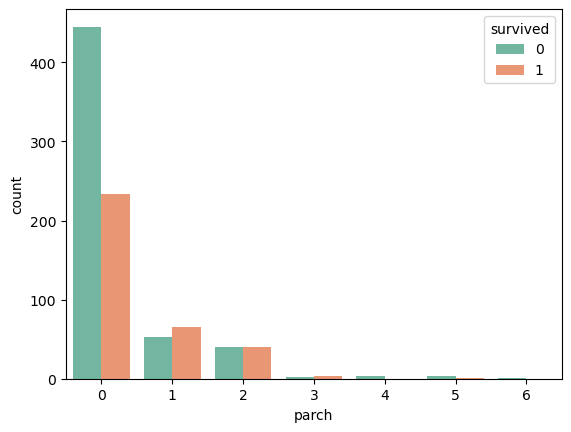

In [314]:
#Count plot of parch vs survived
sns.countplot(x='parch', hue='survived', data=data, palette='Set2')
# Parch is significant for target variable survived

In [315]:
# Calculation of survival percentages for each parch category
survival_rate = data.groupby('parch')['survived'].mean() * 100
print("Percentage of survivors by Parch category:")
print(survival_rate)

Percentage of survivors by Parch category:
parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: survived, dtype: float64


<Axes: xlabel='parch', ylabel='count'>

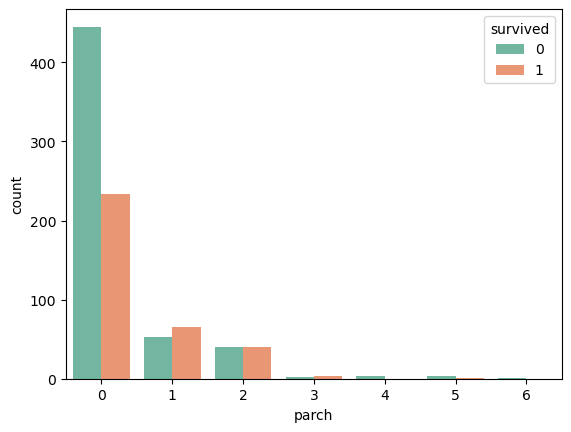

In [316]:
#To check the relationship between parch and survived
sns.countplot(x='parch', hue='survived', data=data, palette='Set2')

<Axes: xlabel='sibsp', ylabel='count'>

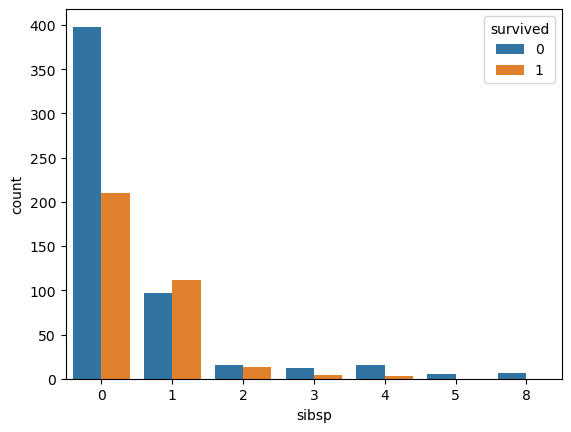

In [317]:
#To check the relationship between sibsp and survived
sns.countplot(x='sibsp', hue = 'survived', data=data)
# survived changes with respect to sibsp, so sibsp is significant with respect to survived = 1 and survived = 0

<Axes: xlabel='sex', ylabel='count'>

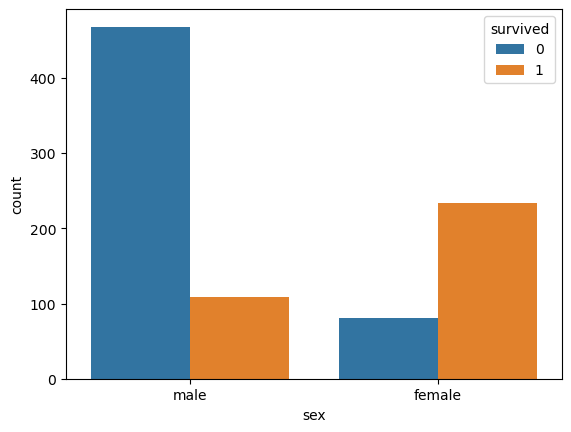

In [318]:
#To check the relationship between sex and survived.
sns.countplot(x='sex', hue = 'survived', data=data)

In [319]:
#Method2: Cross-tab
sex_survived_crosstab = pd.crosstab(data['sex'], data['survived'], margins=True)
print(sex_survived_crosstab)

survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


<Axes: xlabel='parch'>

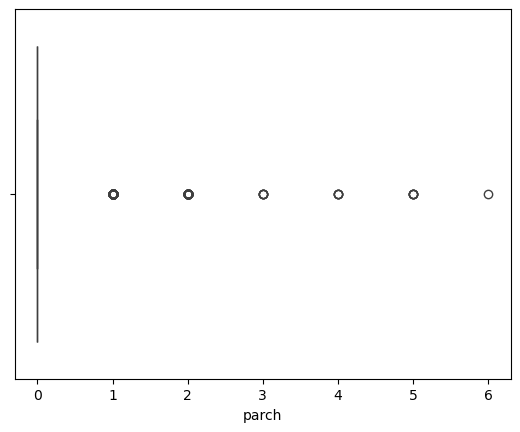

In [320]:
sns.boxplot(x='parch', data = data) # checking the distribution of parch to understand the number of outliers

In [7]:
data.deck.value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [321]:
#To check the relationship between survived and deck after filling or computing the missing values of deck column
deck_survival = data.groupby('deck')['survived'].mean().reset_index() 
deck_survival.rename(columns={'survived': 'Survived_Rate'}, inplace=True)


C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\3266392271.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [322]:
deck_survival

,deck,Survived_Rate
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000


In [323]:
# Here we applying groupby function by grouping the dataset with respect to unique values in the deck column where each group corresponds to a unique deck and all the rows in the group have the same deck value. Then selecting the survived column from the grouped data which contains binary values. For each group (deck) it calculates the mean of the survived column, (the mean represents the proportion of survivers that is the survival rate for that deck). We can do median as well instead of mean incase of presence outliers. After grouping and calculating the mean we convert the result into a data frame with deck as a column having the unique deck identifiers and survived as the calculated survival rate for each deck.

<Figure size 1000x600 with 0 Axes>

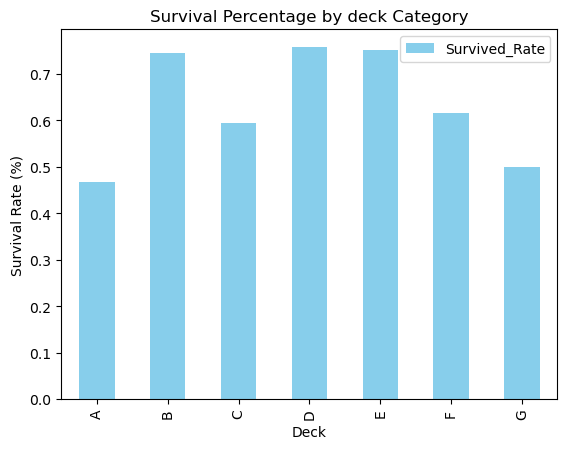

In [324]:
plt.figure(figsize=(10, 6))
deck_survival.plot(x= 'deck', y= 'Survived_Rate',kind='bar', color='skyblue')
plt.title('Survival Percentage by deck Category')
plt.xlabel('Deck')
plt.ylabel('Survival Rate (%)')
plt.show()

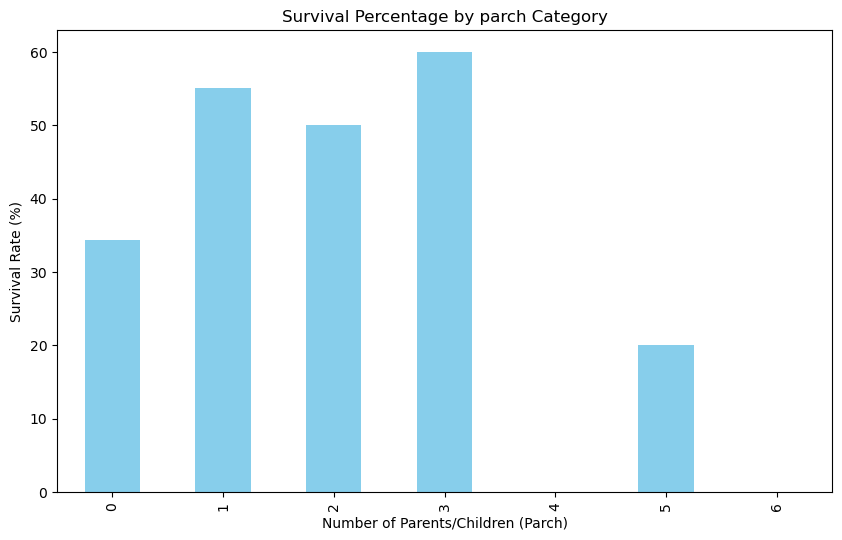

In [325]:
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Percentage by parch Category')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Survival Rate (%)')
plt.show()
# The countplot shows the count of passengers for each parch value with different survival outcomes (hue for survived).
# We calculated the survival rate for each parch category by grouping the dataset by parch and taking the mean of the survived column.( Median would be used preferrably in case we have many outliers instead of mean, because mean is affected by too many number of outliers
# A bar chart shows the percentage of survivors for each parch category to visually assess if parch is significant in survival.

In [326]:
# Calculating survival percentages for each parch category
survival_rate = data.groupby('parch')['survived'].mean().reset_index() # The survival_rate is calculated by grouping the data on parch, taking the mean of survived, and converting it to percentages.
# We pass parch as the x and survived as the y to sns.barplot, which automatically handles the plotting of survival percentages for each parch category.
survival_rate['survived'] = survival_rate['survived'] * 100


C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\55770796.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Survival Rate (%)')

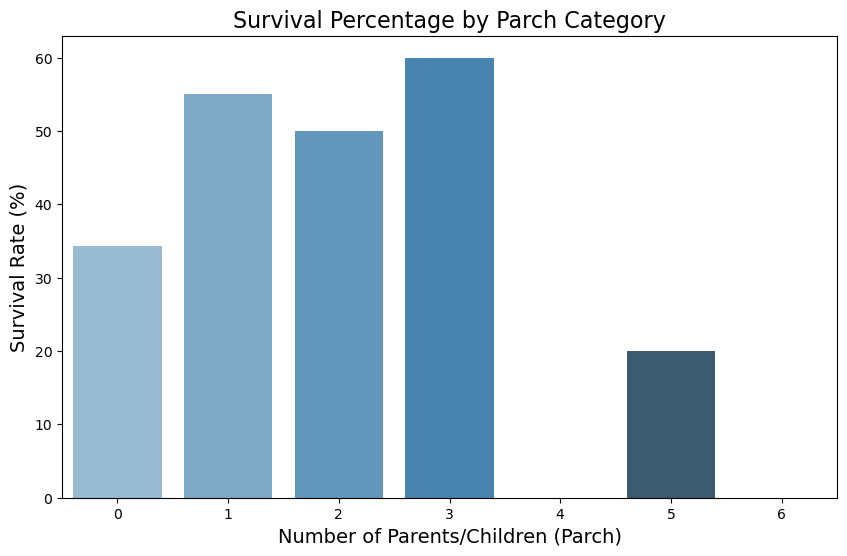

In [327]:
#Method 2 of doing barplot with sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='parch', y='survived', data=survival_rate, palette='Blues_d')
plt.title('Survival Percentage by Parch Category', fontsize=16)
plt.xlabel('Number of Parents/Children (Parch)', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)

In [328]:
data.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [329]:
#Columns to delete:- fare, class, who, adult_male, emabark_town, alive, alone ((before model building)

<Axes: xlabel='survived', ylabel='fare'>

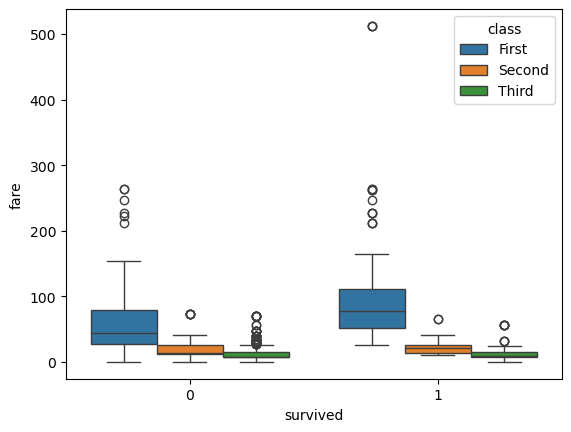

In [330]:
#To check the relationship between survived and fare
sns.boxplot(x='survived', y='fare', hue = 'class', data=data)
# High ticket fares are equally prone to survived = 0 and survived = 1
# Outliers
# Maximum and minimum
# Spread of the box (distance between the 1st quartile ( below which 25 % of the data lies) and 3rd quartile ( below which 75 % of the data lies) The spread is covering 50 % of the entire column on which we are doing the box plot
# second quartile is in between the 1st quartile and 3rd quartile within the box which covers below that 50% of the data set. It is also called the median. If the median is more inclined towards the 3rd quartile then it is negatively skewed distribution where left tail (distance between start of the box and the median) is longer than the right tail.(Distance between median and end of the box)
# We can add hue as a categorical variable input to break each box plot corresponding to each data combination
# Both high and low fares are present for survived = 0 and survived = 1 categories for the different classes, so there is no relationship between fare and survived because irrespective of low and high fares we have proportions of survived = 0 and survived = 1, so fare is a redundant column for our target variable survived
# The column fare could be deleted (before the model building step) because it is redundant for the target variable survived.

<Axes: xlabel='class'>

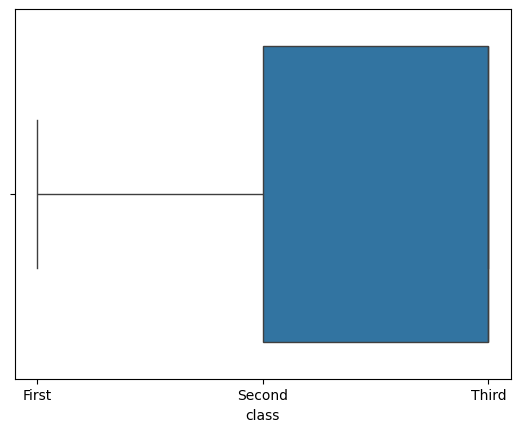

In [331]:
sns.boxplot(x = 'class', data = data)

In [332]:
data['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

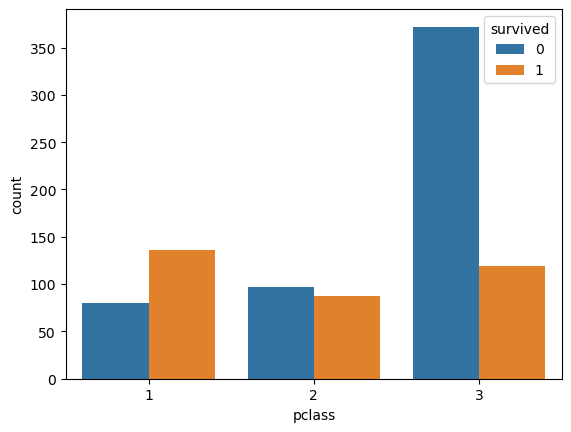

In [333]:
sns.countplot(x='pclass', hue = 'survived', data=data)

In [334]:
#Though the number of people in pclass = 3 are significantly more than pclass=1 and 2, still the proportion of number of died passengers is significantly high(81.46%) when compared to proportion of died passengers in other pclasses which implies we have to check what could be the possible reason of more number of died people in pclass = 3

In [335]:
data.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [336]:
400/491

0.814663951120163

In [337]:
70/216

0.32407407407407407

In [338]:
90/184

0.4891304347826087

In [339]:
#Let us find the number of nonsmokers who are male.
#male nonsmokers
survived_0 = data[(data['survived'] == 0) & (data['class'] == 'First')]

# Checking the quartiles
Q1 = survived_0['fare'].quantile(0.25)
Q3 = survived_0['fare'].quantile(0.75)
IQR = Q3-Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = survived_0[(survived_0['fare'] < lower_bound) | (survived_0['fare'] > upper_bound)]
len(outliers)


6

In [340]:
IQR

51.1948

In [341]:
Range = upper_bound - lower_bound
Range


204.7792

In [342]:
#Let us find the number of nonsmokers who are male.
#male nonsmokers
survived_0 = data[(data['survived'] == 0) & (data['class'] == 'Second')]

# Checking the quartiles
Q1 = survived_0['fare'].quantile(0.25)
Q3 = survived_0['fare'].quantile(0.75)
IQR = Q3-Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = survived_0[(survived_0['fare'] < lower_bound) | (survived_0['fare'] > upper_bound)]
len(outliers)

Range = upper_bound - lower_bound
Range

(IQR / Range) * 100

25.0

In [343]:
Range = upper_bound - lower_bound
Range

58.0

In [344]:
IQR

14.5

#computing the missing values of age column

We have multiple methods to compute the missing values of age column. However, we will choose that method which is maximum close to the original values and prone to less error (without overfitting)
Method 1 - We can compute the missing values of age by substituting them with the average of the non null values existing in the age column. However, before approximating the missing values with average, we would have to check incase there are many outliers of the age column because then the average will be affected by the presence of too many outliers and we can do the missing value computation with respect to median (not being affect affected by presence of too many outliers)

Method 2 - We can compute the missing values of age column with any correlated column of age.

Method 3 - We can also compute the missing values of age column with the help mode (value occurring with maximum frequency)



In [346]:
#Computation of missing values of age column with Method 1
#(Both average and median is done)
# In case we fill the missing values with average for age column then
# data['age'].fillna(data['age'].mean(), inplace=True)

#checking the number of outliers in age column
#sns.boxplot(x='age', data=data)
#There are many outliers in the distribution of age column so we need to compute the missing values with median
#data['age'].fillna(data['age'].median(), inplace=True) # we are extracting the median of the age column and computing the missing values of the age column with extracted median, inplace = True means permanent modification


In [347]:
#data.age.isnull().sum()

In [348]:
# So there are no further missing values in the age column

In [349]:
# Method 3
#data['age'].fillna(data['age'].mode()[0], inplace=True)

In [350]:
#data.age.isnull().sum()

In [351]:
#data['age'].mode() #To check the mode for age column

In [352]:
#data.age.value_counts()

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\2996774615.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Age')

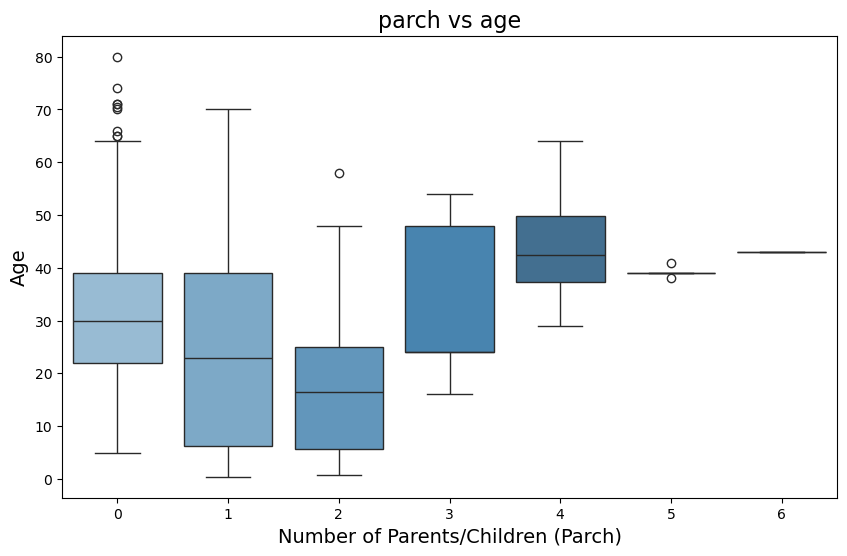

In [353]:
# Method 2 (preferrable)
#sibsp / parch could be the correlated column with age, but we need to validate that old people are travelling alone or not and similarly young people.
# checking the visualization of age vs sibsp and age vs parch with help of respective box plots.

plt.figure(figsize=(10, 6))
sns.boxplot(x='parch', y='age', data=data, palette='Blues_d')
plt.title('parch vs age', fontsize=16)
plt.xlabel('Number of Parents/Children (Parch)', fontsize=14)
plt.ylabel('Age', fontsize=14)

In [354]:
# So parch column is significant for age
#Add the insights for the box plot


C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\2390694263.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Age')

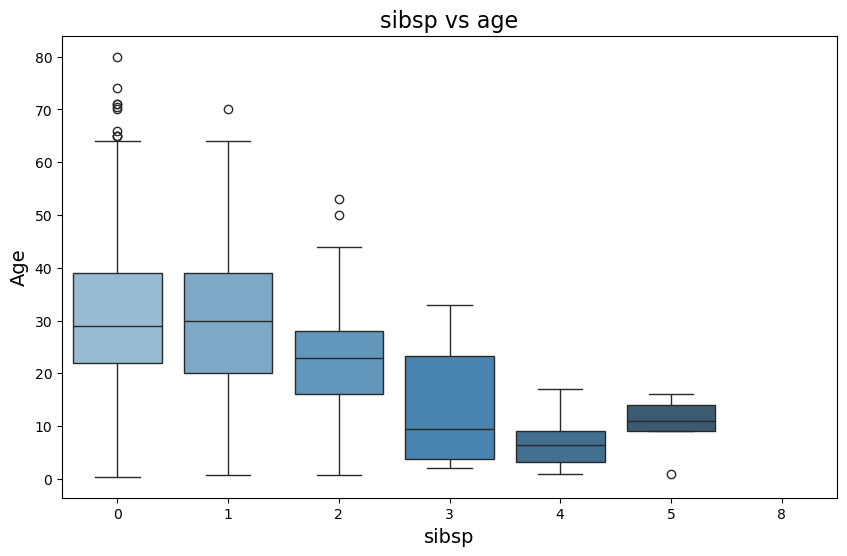

In [355]:
#checking the relationship of sibsp with age
plt.figure(figsize=(10, 6))
sns.boxplot(x='sibsp', y='age', data=data, palette='Blues_d')
plt.title('sibsp vs age', fontsize=16)
plt.xlabel('sibsp', fontsize=14)
plt.ylabel('Age', fontsize=14)

In [356]:
# So parch is more correlated with high interrationship with age column, so we choose the parch column to compute the missing values of age in method 2.
# Wherever parch is 0 the median age is 25.0, if parch = 1 then median is 24.0 and so on till parch = 6, median age is 43 found in the below code
# We have observed that the above parch categories are corelated to age column, so to compute the missing values for age 
# column, we can check for each parch category, if the age corresponding to that category is null then we should replace
# with the median value of age for that corresponding parch category.
# So now we are going to find the respective median ages corresponding to each parch category by using the groupby function.
parch=data.groupby(data['parch'])
parch


In [357]:
#Extracting the median values of each group of the parch column
parch_median=data.groupby('parch')['age'].median()
parch_median

parch
0    30.0
1    23.0
2    16.5
3    24.0
4    42.5
5    39.0
6    43.0
Name: age, dtype: float64

In [358]:
def age1(col):
    Age=col[0]
    Parch=col[1]
    if pd.isnull(Age):
        if parch == 0:
            return 28
        elif parch == 1:
            return 25
        elif parch == 2:
            return 19
        elif parch == 3:
            return 24
        elif parch == 4:
            return 43
        elif parch == 5:
            return 39
        else:
            return 43
    else:
        return Age

In [359]:
data['age'] = data[['age', 'parch']].apply(age1, axis=1) #axis = 1 means columns in python and axis = 0 means rows. #We care applying the created function age1 in the column to replace the missing values of age from the dataset data.

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\2229503031.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\2229503031.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [360]:
data.age.isnull().sum()

0

In [361]:
sibsp_median=data.groupby('sibsp')['age'].median()
sibsp_median
# parch is a better approximation to the data for computing missing values of age column because the median ages with respect to each parch category are significantly different, thereby making a better decrimination with respect to missing value computation.


sibsp
0    34.0
1    33.0
2    24.0
3    21.0
4     6.5
5    11.0
8    43.0
Name: age, dtype: float64

<Axes: xlabel='embark_town'>

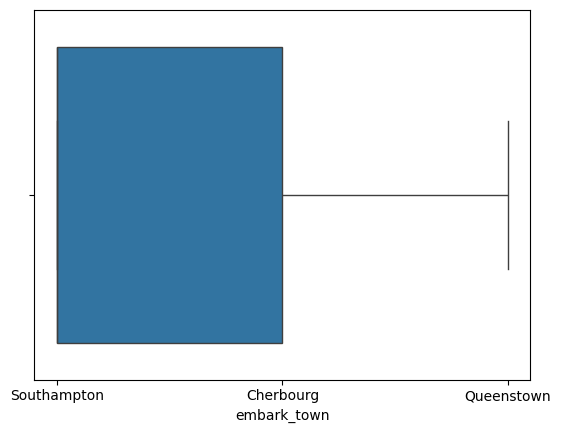

In [362]:
# Checking the missing values for embark_town
sns.boxplot(x='embark_town', data=data)

In [363]:
data.embark_town.isnull().sum()

2

<Axes: xlabel='embarked'>

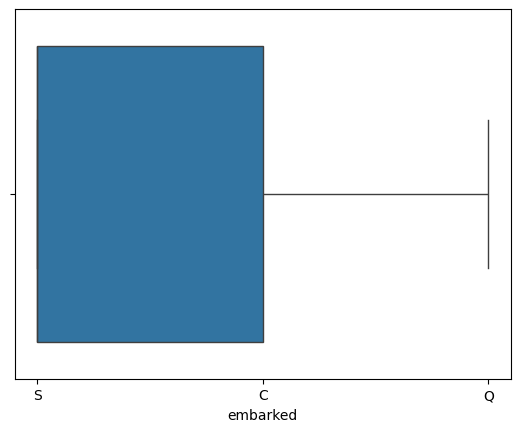

In [364]:
sns.boxplot(x='embarked', data=data)

In [365]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [366]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,43.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [367]:
data.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [368]:
# calculating the missing values of deck column
data.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [369]:
data.deck.isnull().sum()

688

In [370]:
data.shape

(891, 15)

In [371]:
#out of 891 rows in the dataset 688 are null in the deck column which means the mode of the column is also null, so we cannot compute the missing of deck column using mode.
# Mean and median is also not feasible because it is a string column.
# SInce there are too many missing values in deck column so we fill them with the word 'other'


In [372]:
data['deck'] = pd.Categorical(data['deck'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'other'], ordered=True)
data['deck'] = data['deck'].fillna('other')

In [373]:
data.deck.value_counts()

deck
other    688
C         59
B         47
D         33
E         32
A         15
F         13
G          4
Name: count, dtype: int64

In [374]:
data.deck.isnull().sum()

0

In [375]:
data.embarked.isnull().sum()

2

In [376]:
data.embarked.value_counts()


embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [377]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\879075962.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [378]:
data.embarked.isnull().sum()

0

In [379]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,other,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,other,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,other,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,other,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,43.0,1,2,23.4500,S,Third,woman,False,other,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [380]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [381]:
# Applying adhoc visuals

In [382]:
import plotly.express as px
import matplotlib.pyplot as plt
import squarify

In [383]:
#!pip install squarify

In [384]:
#Performing a tree map to show the survival counts by class & sex
survival_counts1 = data.groupby(['class', 'sex']).size().reset_index(name='counts')

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\3295764301.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [385]:
survival_counts1

,class,sex,counts
0,First,female,94
1,First,male,122
2,Second,female,76
3,Second,male,108
4,Third,female,144
5,Third,male,347


In [386]:
survival_counts1['label'] = survival_counts1['class'].astype(str) + ' - ' + survival_counts1['sex'].astype(str) #concatenate

In [387]:
survival_counts1

,class,sex,counts,label
0,First,female,94,First - female
1,First,male,122,First - male
2,Second,female,76,Second - female
3,Second,male,108,Second - male
4,Third,female,144,Third - female
5,Third,male,347,Third - male


(0.0, 100.0, 0.0, 100.0)

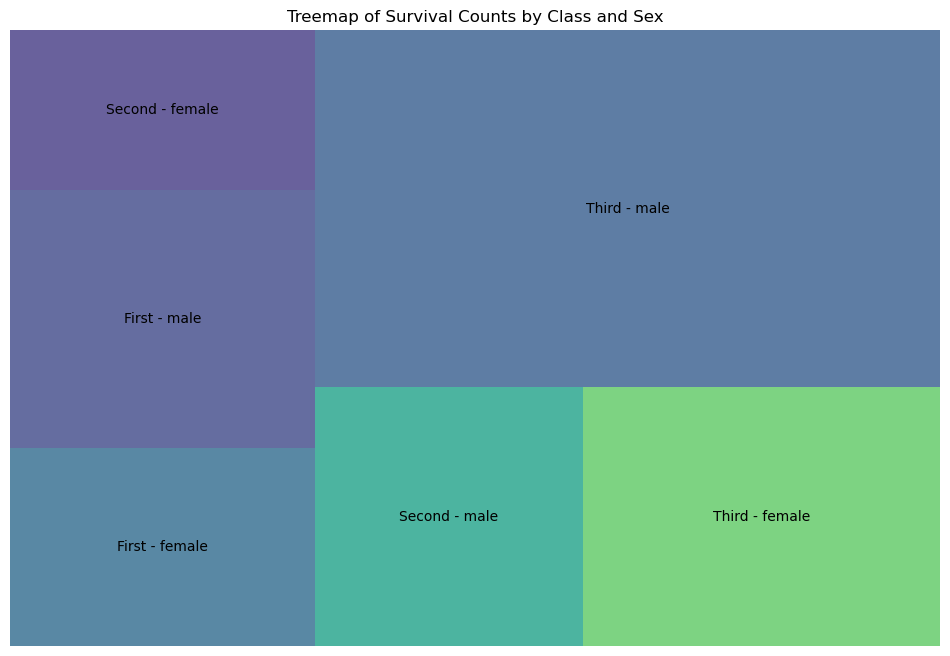

In [388]:
plt.figure(figsize=(12, 8))
squarify.plot(sizes=survival_counts1['counts'], 
              label=survival_counts1['label'], 
              alpha=0.8) #sets the transparency of the rectangles based on colours, alpha = 0.8 means rectangles are slightly transparent (20% see through)
plt.title('Treemap of Survival Counts by Class and Sex')
plt.axis("off") # To turn the axis off

Treemap: A Treemap is a type of data visualization that displays hierarchical data as a set of nested rectangles. Each rectangle represents a data point and the size of the rectangle is proportional to a specific numeric value. Treemaps are useful for showing how different categories and subcategories compare in terms of size or value.

In [390]:
# Treemap with respect to survived for combination embarked and parch
survival_counts2 = data.groupby(['embarked', 'parch']).size().reset_index(name='counts')

In [391]:
survival_counts2['label'] = survival_counts2['embarked'].astype(str) + ' - ' + survival_counts2['parch'].astype(str) #concatenate

In [392]:
survival_counts2

,embarked,parch,counts,label
0,C,0,123,C - 0
1,C,1,30,C - 1
2,C,2,14,C - 2
3,C,3,1,C - 3
4,Q,0,69,Q - 0
5,Q,1,6,Q - 1
6,Q,2,1,Q - 2
7,Q,5,1,Q - 5
8,S,0,486,S - 0
9,S,1,82,S - 1


In [393]:
treemap_data = (
    data.groupby(['survived', 'embarked', 'parch'])
    .size()
    .reset_index(name='counts')
)
treemap_data['label'] = treemap_data.apply(
    lambda row: f"Survived: {row['survived']}\nEmbarked: {row['embarked']}\nParch: {row['parch']}\nCount: {row['counts']}",
    axis=1
)
treemap_data

,survived,embarked,parch,counts,label
0,0,C,0,60,Survived: 0\nEmbarked: C\nParch: 0\nCount: 60
1,0,C,1,11,Survived: 0\nEmbarked: C\nParch: 1\nCount: 11
2,0,C,2,4,Survived: 0\nEmbarked: C\nParch: 2\nCount: 4
3,0,Q,0,39,Survived: 0\nEmbarked: Q\nParch: 0\nCount: 39
4,0,Q,1,6,Survived: 0\nEmbarked: Q\nParch: 1\nCount: 6
5,0,Q,2,1,Survived: 0\nEmbarked: Q\nParch: 2\nCount: 1
6,0,Q,5,1,Survived: 0\nEmbarked: Q\nParch: 5\nCount: 1
7,0,S,0,346,Survived: 0\nEmbarked: S\nParch: 0\nCount: 346
8,0,S,1,36,Survived: 0\nEmbarked: S\nParch: 1\nCount: 36
9,0,S,2,35,Survived: 0\nEmbarked: S\nParch: 2\nCount: 35


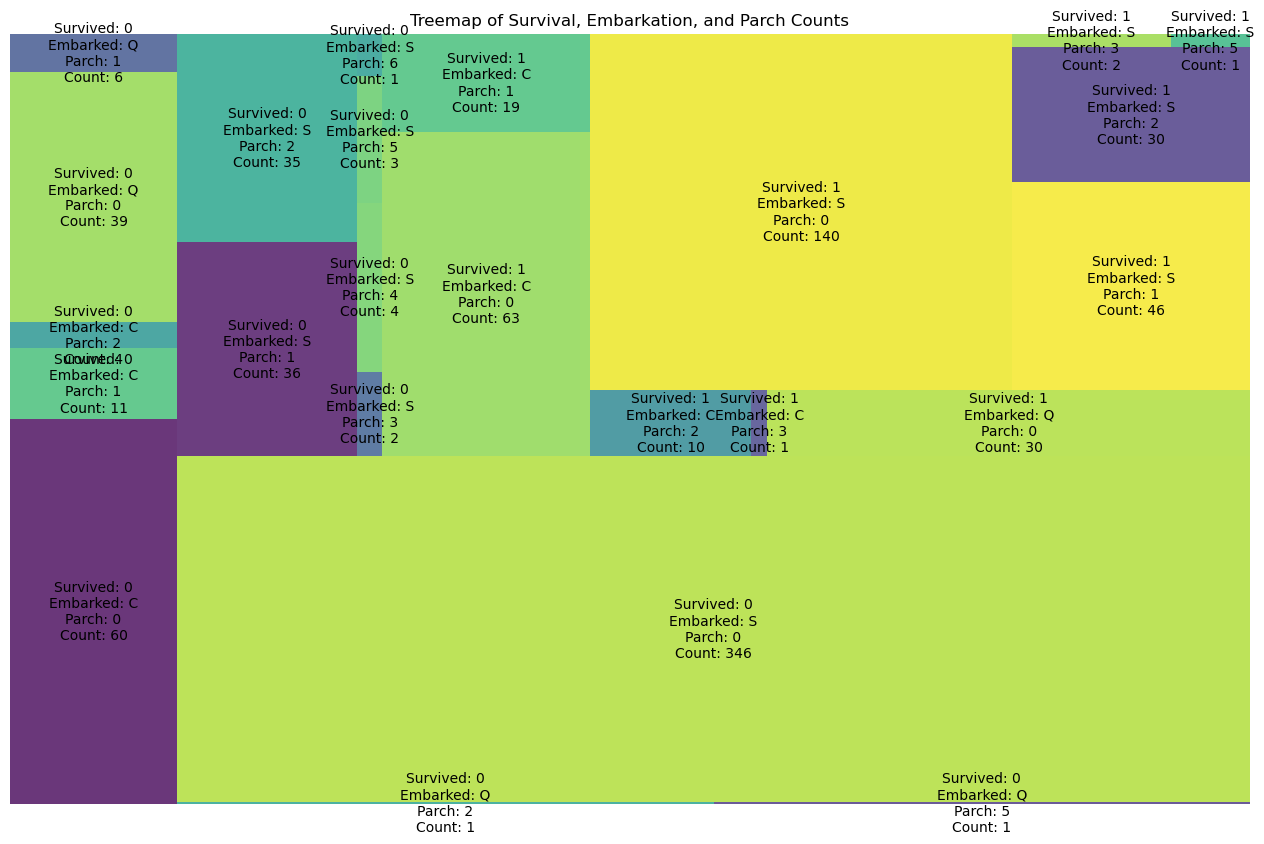

In [394]:
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=treemap_data['counts'], 
    label=treemap_data['label'], 
    alpha=0.8
)
plt.title('Treemap of Survival, Embarkation, and Parch Counts')
plt.axis('off')
plt.show()

C:\Users\sunilk\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\sunilk\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



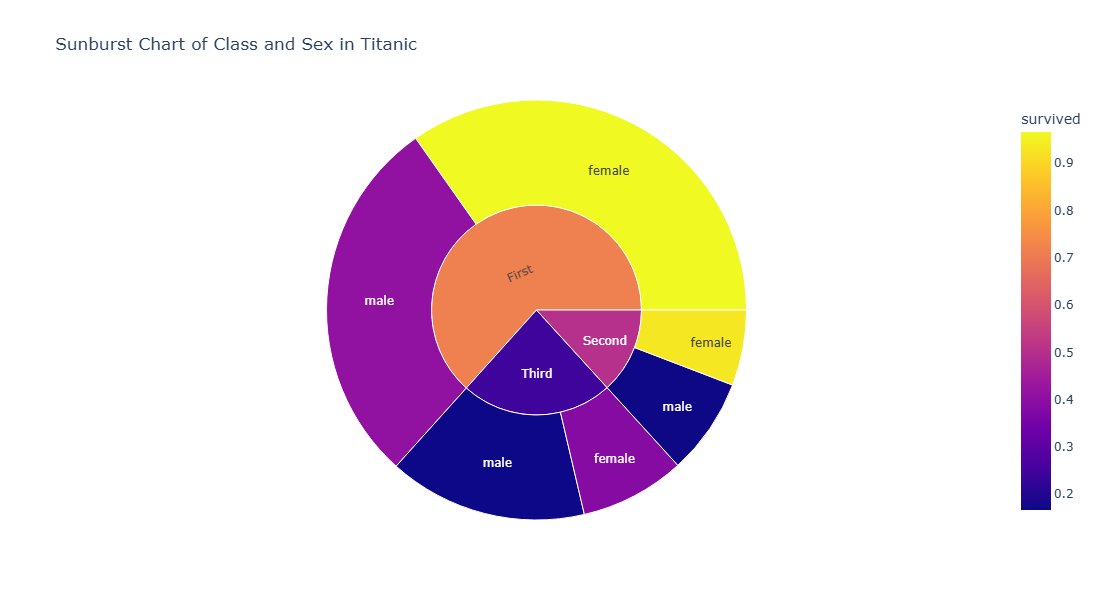

In [395]:
#sunburst: Its is useful to see the hierarchical relationships in the form of a pie chart similarity
#plt.figure(figsize=(20, 8))
fig = px.sunburst(data, path=['class', 'sex'], values='fare',
                  title='Sunburst Chart of Class and Sex in Titanic',
                  color='survived')
fig.update_layout(width=800, height=600) #setting the height and width to 600 and 800 pixels respectively
fig.show()

In [396]:
data1

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


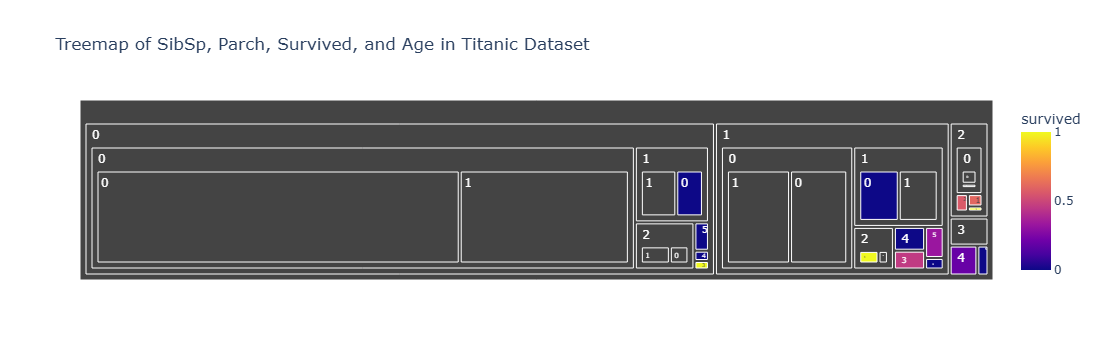

In [397]:
fig = px.treemap(data1, path=["sibsp", "parch", "survived"], values="age",
color="survived",
title="Treemap of SibSp, Parch, Survived, and Age in Titanic Dataset")
fig.show()



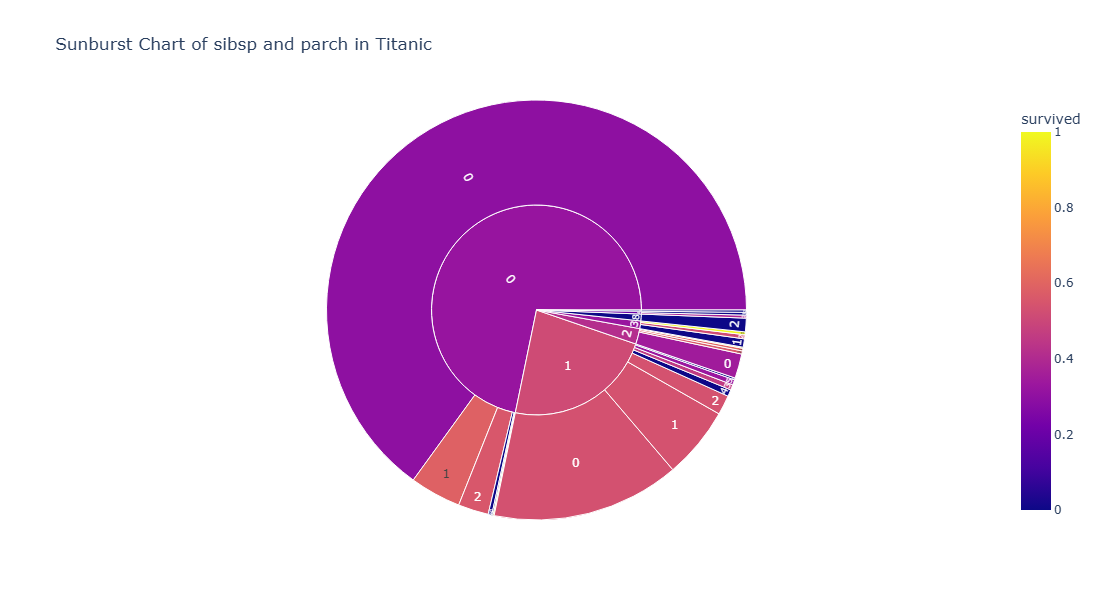

In [398]:
#sunburst to see the distribution of age with respect to presence or absence of parent and children (parch) and sibling and spouse (sibsp) with the survived column
fig = px.sunburst(data, path=['sibsp', 'parch'], values='age',
                  title='Sunburst Chart of sibsp and parch in Titanic',
                  color='survived')
fig.update_layout(width=800, height=600) #setting the height and width to 600 and 800 pixels respectively
fig.show()

In [399]:
data.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [400]:
data.parch.value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

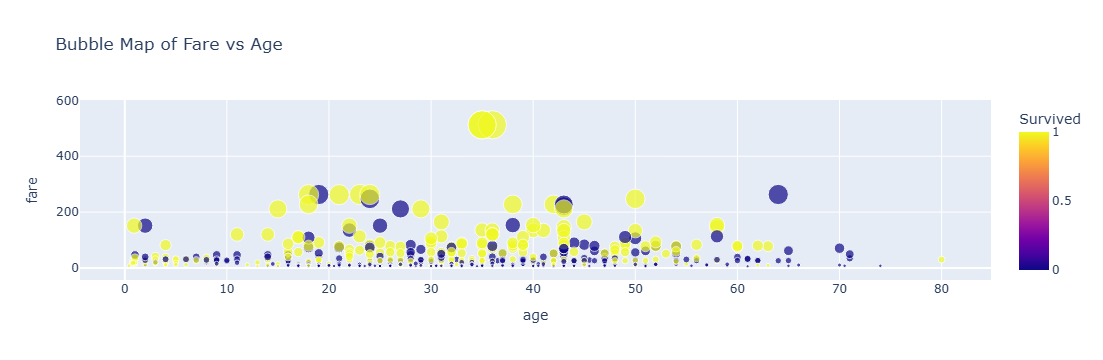

In [401]:
#Bubblemap
fig = px.scatter(data, x='age', y='fare', size='fare', color='survived',
                 title='Bubble Map of Fare vs Age',
                 labels={'survived': 'Survived'})
fig.show()

Bubblemap: is a type of visualization that displays data points as bubbles on a 2D figure, it is an extension of scatterplot where the size of the bubbles represnt an additional dimension of the data. (eg: the size or area of each bubble represents a third variable which is usually numeric. Larger bubbles indicate higher values of the third variable and smaller bubbles indicate lower values.)

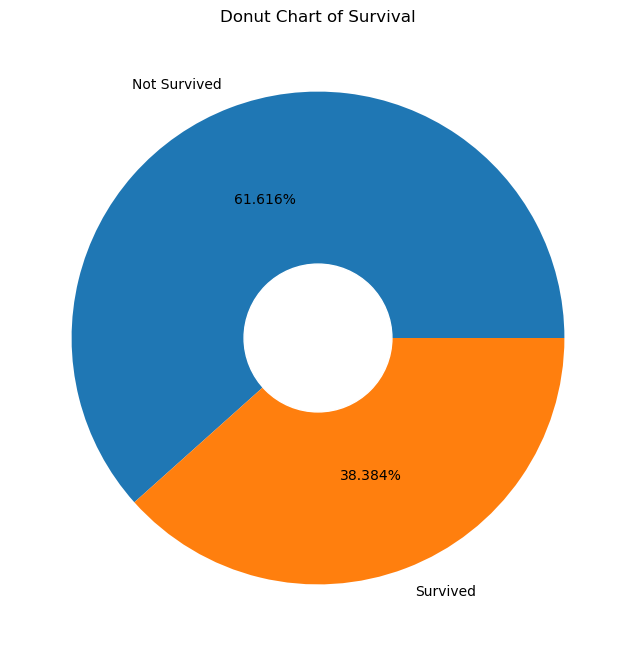

In [403]:
# Donut chart is a variation of pie chart with a hole in the center
survival_counts = data['survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.3f%%')
plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))
plt.title('Donut Chart of Survival')
plt.show()

In [404]:
survival_counts

survived
0    549
1    342
Name: count, dtype: int64

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='sex', ylabel='age'>

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



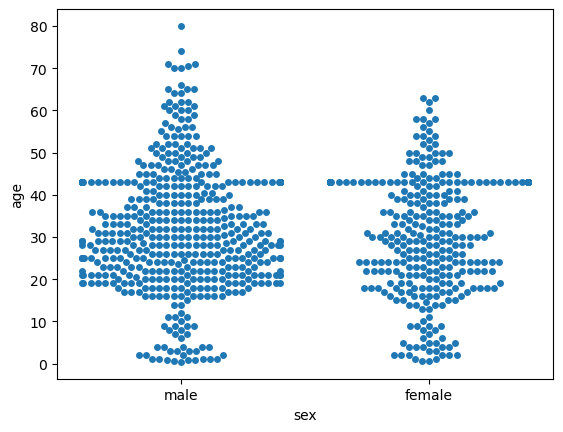

In [405]:
# swarm plot: Swarm plot is a type of categorical scatter plot where each datapoint is plotted as dot.
sns.swarmplot(x = data['sex'],y = data['age'])

In [406]:
# Point plot shows point estimates and confidence intervals using scatter points

In [407]:
# Point plot of survival rate by class and sex (3 categorical variables)

In [408]:
grouped_data = data.groupby(['class', 'sex'])['survived'].mean().reset_index()
grouped_data

C:\Users\Sunil Kamat\AppData\Local\Temp\ipykernel_9600\2736893726.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,class,sex,survived
0,First,female,0.968085
1,First,male,0.368852
2,Second,female,0.921053
3,Second,male,0.157407
4,Third,female,0.500000
5,Third,male,0.135447


In [409]:
grouped_data.rename(columns={'survived': 'Survived Mean'}, inplace=True)
grouped_data

,class,sex,Survived Mean
0,First,female,0.968085
1,First,male,0.368852
2,Second,female,0.921053
3,Second,male,0.157407
4,Third,female,0.500000
5,Third,male,0.135447


Text(0.5, 1.0, 'pointplot of survived status by class and sex')

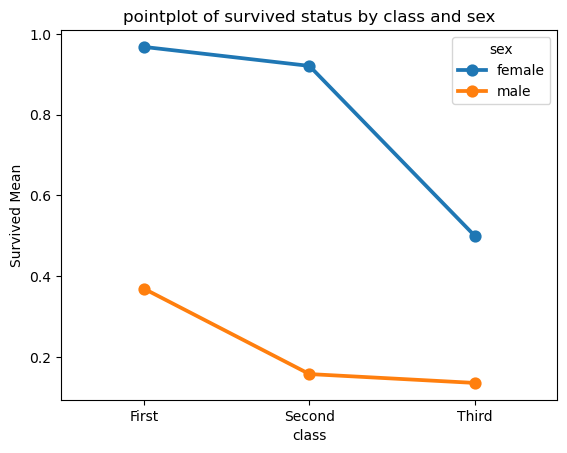

In [410]:
sns.pointplot(x= 'class' ,y= 'Survived Mean', hue= 'sex', data = grouped_data)
plt.title('pointplot of survived status by class and sex')

In [411]:
#Insights: The sns.pointplot function computes the mean of survived for each group defined by the combination of class and sex.
# For example, if in a group:
# 60% survived: the mean is 0.6, and that's the point plotted.
# 40% survived: the mean is 0.4, and so on.

In [412]:
# Point plot of survival rate by sibsp and parch

Text(0.5, 1.0, 'pointplot of survived status by sibsp and sex')

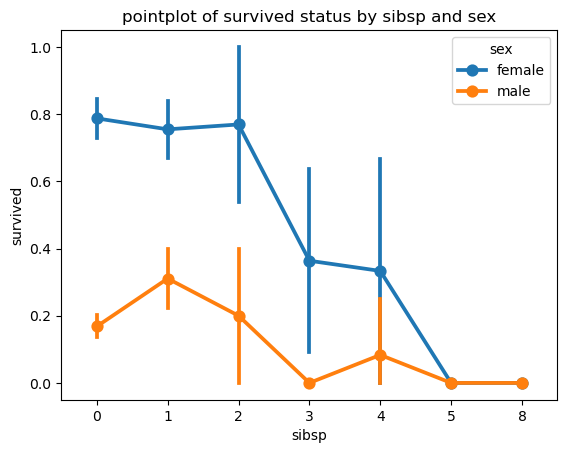

In [413]:
sns.pointplot(x= 'sibsp' ,y= 'survived', hue= 'sex', data = data)
plt.title('pointplot of survived status by sibsp and sex')

Text(0.5, 1.0, 'pointplot of survived status by parch and sex')

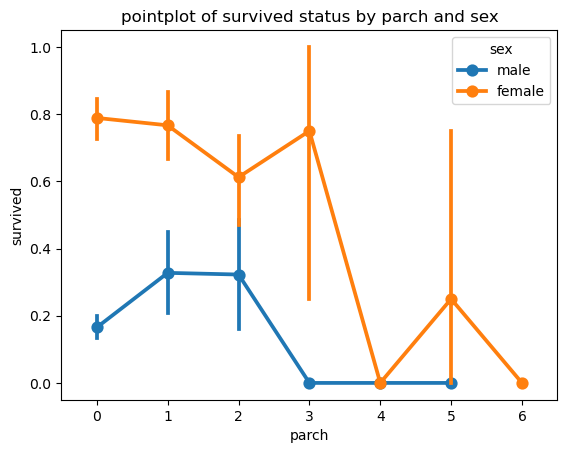

In [414]:
sns.pointplot(x= 'parch' ,y= 'survived', hue= 'sex', data = data)
plt.title('pointplot of survived status by parch and sex')

Text(0.5, 1.0, 'pointplot of survived status by parch and embarked')

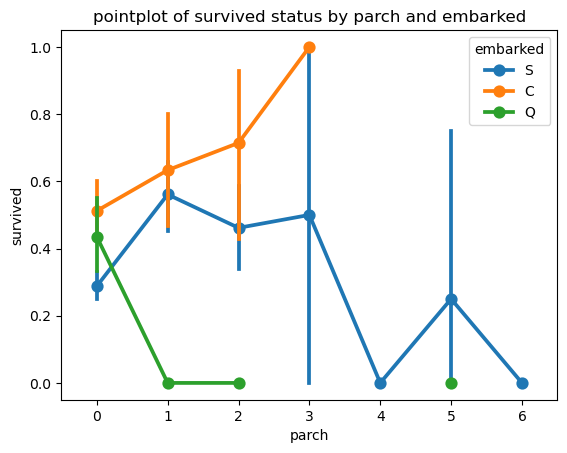

In [415]:
sns.pointplot(x= 'parch' ,y= 'survived', hue= 'embarked', data = data)
plt.title('pointplot of survived status by parch and embarked')

Text(0.5, 1.0, 'pointplot of survived status by embarked and sex')

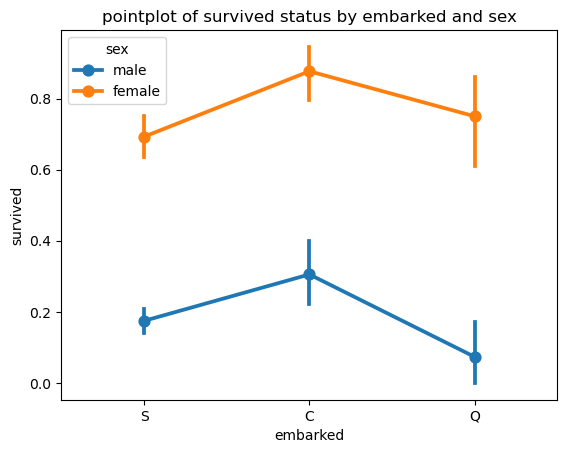

In [416]:
sns.pointplot(x= 'embarked' ,y= 'survived', hue= 'sex', data = data)
plt.title('pointplot of survived status by embarked and sex')

<Axes: xlabel='class', ylabel='age'>

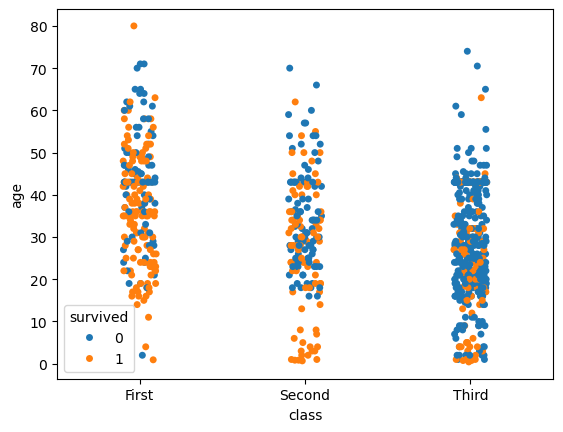

In [417]:
# Strip Plot: is similar to swarm plot and box plot, it shows individual data points on a catgorical axis where x could be taken as catgorical, y as continuos and hue as categorical
# stripplot of age by class and survived
sns.stripplot(x = data['class'],y = data['age'], hue = data['survived'])

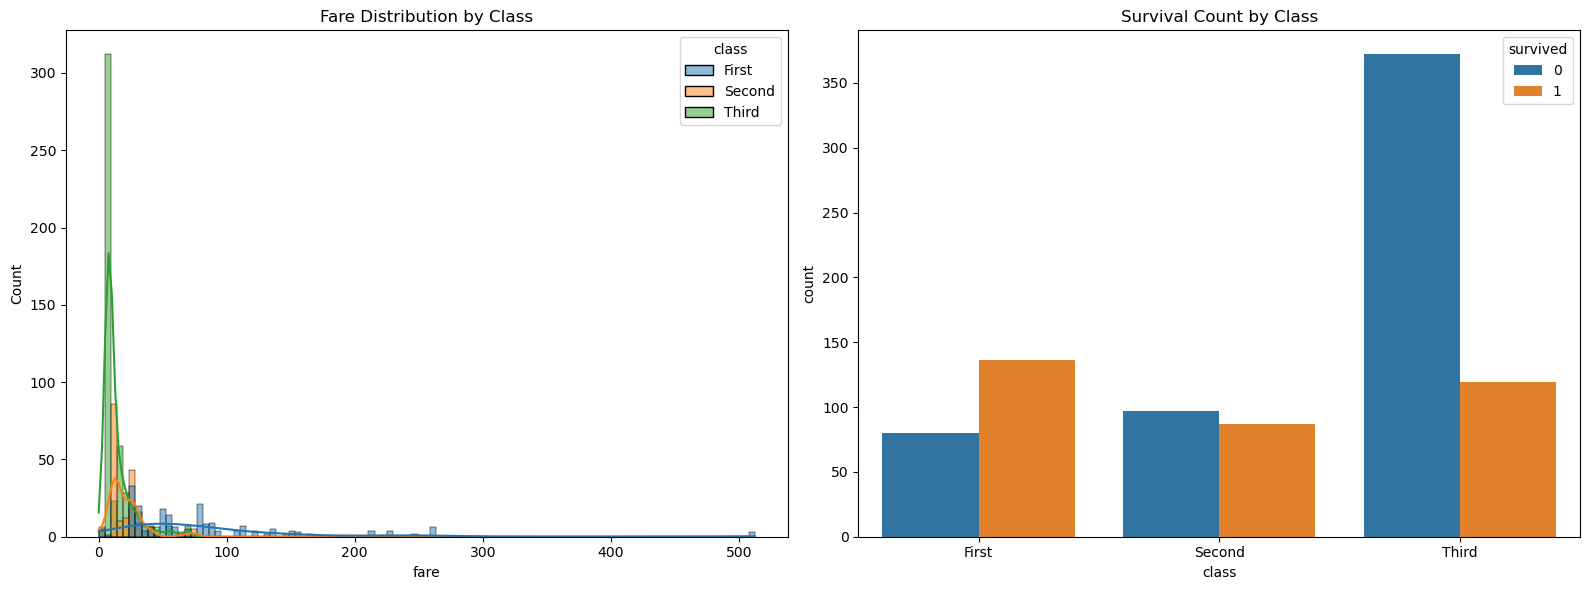

In [418]:
#subplot: Multiple plots within one plot
# It is used to display multiple charts in one figure.
# example: subplot showing fare distribution and survival by class.
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
sns.histplot(data, x='fare', hue='class', ax=ax[0], kde=True)#kernel density estimation
ax[0].set_title('Fare Distribution by Class')

sns.countplot(data=data, x='class', hue='survived', ax=ax[1])
ax[1].set_title('Survival Count by Class')

plt.tight_layout()
plt.show()

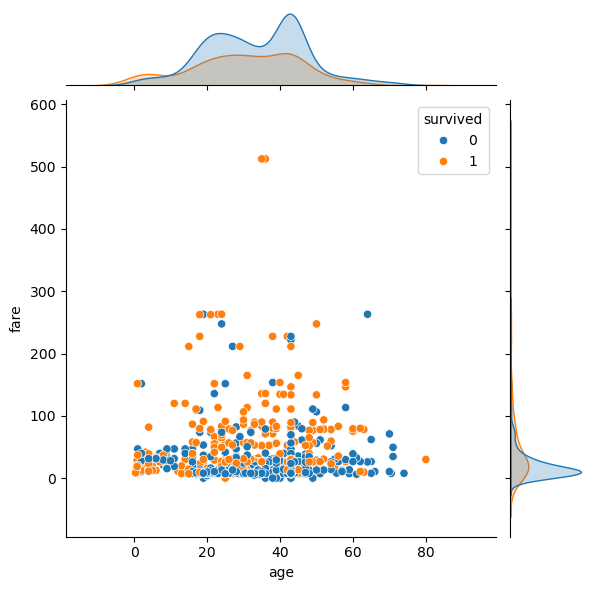

In [419]:
#Joint Plot: It shows the relationship between two continuous variables with different 'kind' options as below
#kind = 'scatter' (scatter plot)
#kind = 'hex' (hexagon)
#kind = 'kde' (density curve)
#kind = 'reg' (regression plot)
#kind = 'resid' (residual plot)

sns.jointplot(x = 'age', y = 'fare', hue = 'survived', data = data)

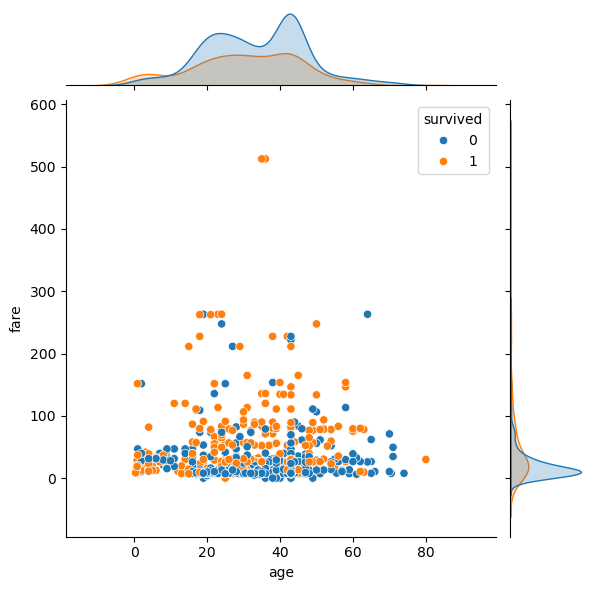

In [420]:
sns.jointplot(x = 'age', y = 'fare', hue = 'survived', data = data, kind = 'scatter')

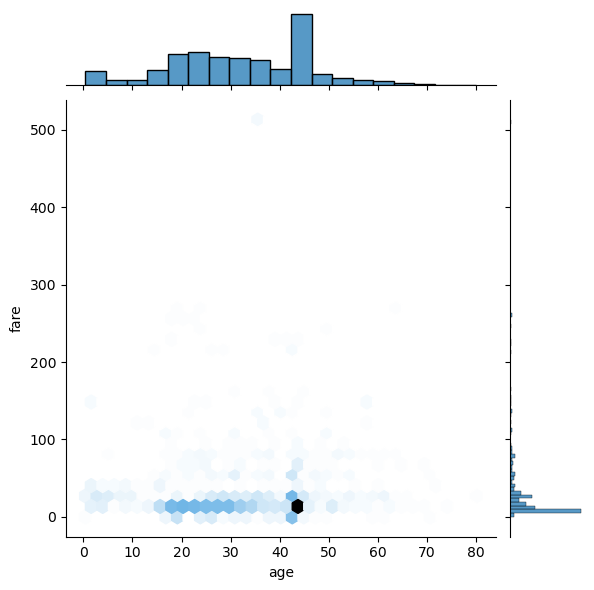

In [421]:
sns.jointplot(x = 'age', y = 'fare', data = data, kind = 'hex')

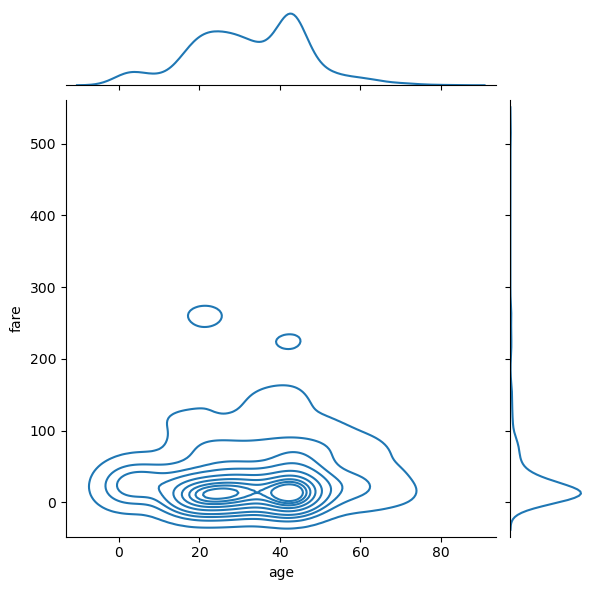

In [422]:
sns.jointplot(x = 'age', y = 'fare', data = data, kind = 'kde')

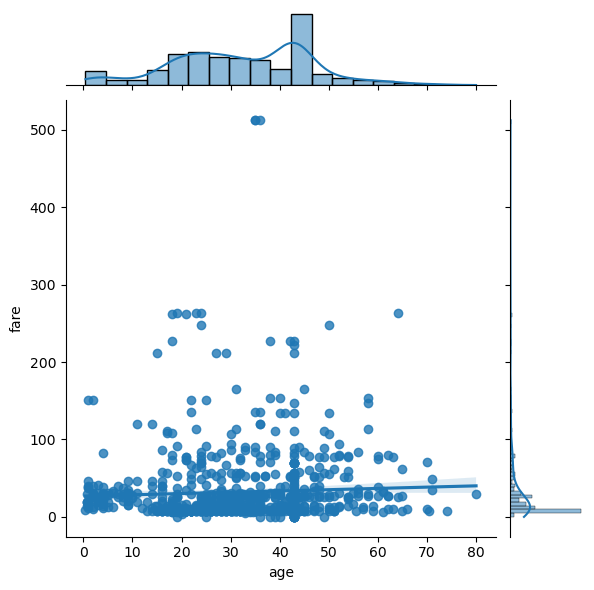

In [423]:
sns.jointplot(x = 'age', y = 'fare', data = data, kind = 'reg')

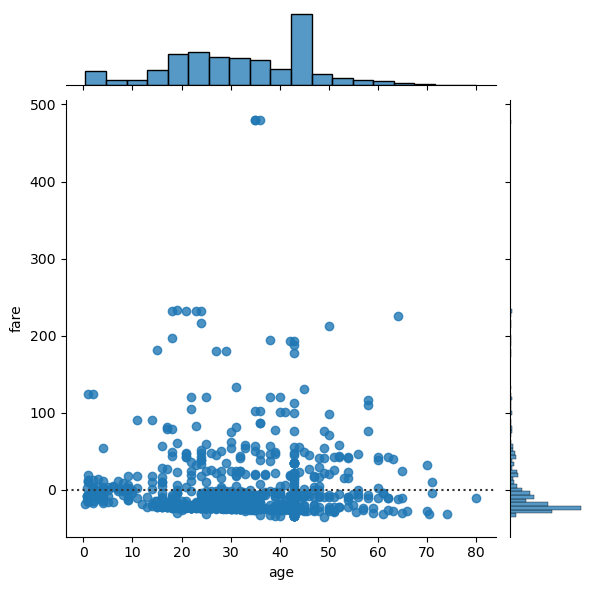

In [424]:
sns.jointplot(x = 'age', y = 'fare', data = data, kind = 'resid')

<Axes: xlabel='sibsp', ylabel='age'>

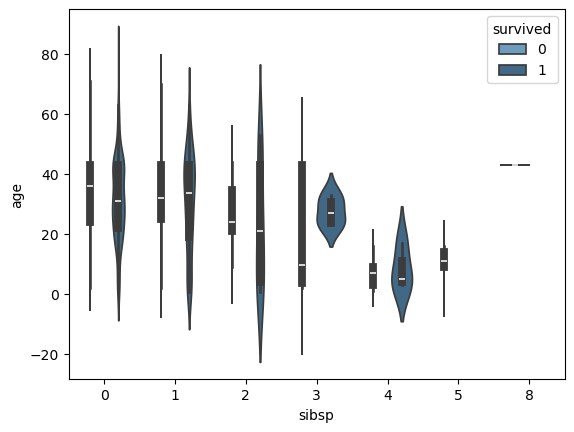

In [425]:
# violin (similar to box plot)
sns.violinplot(x='sibsp', y='age', hue='survived', data=data, palette='Blues_d')

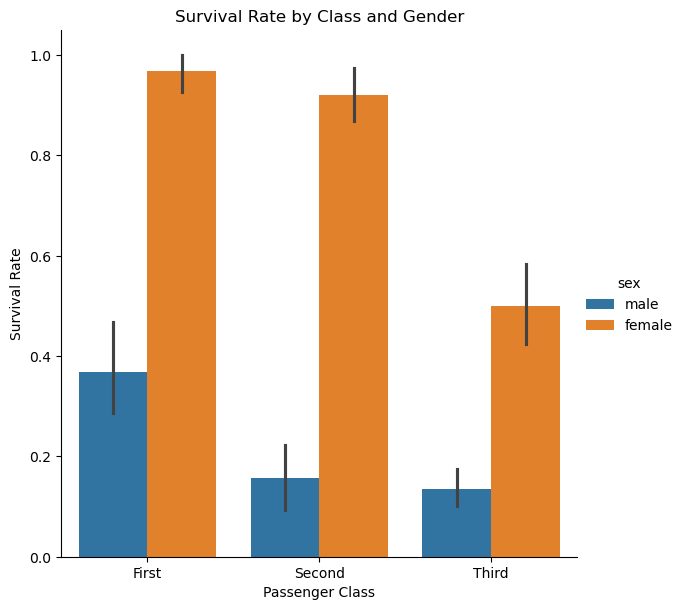

In [426]:
# cat plot - helps in creating plots that involve categorical data, which is useful for understanding the distribution, summary statistics or relationships between categories, it also helps in EDA to find pattens or differences across groups.
# Different 'kind' of plots customizable as bar, strip, swarm, box, violin, point plot

sns.catplot( x='class', y='survived', hue='sex', kind='bar', data=data, height=6, aspect=1 ) 
plt.title('Survival Rate by Class and Gender') 
plt.xlabel('Passenger Class') 
plt.ylabel('Survival Rate') 
plt.show()


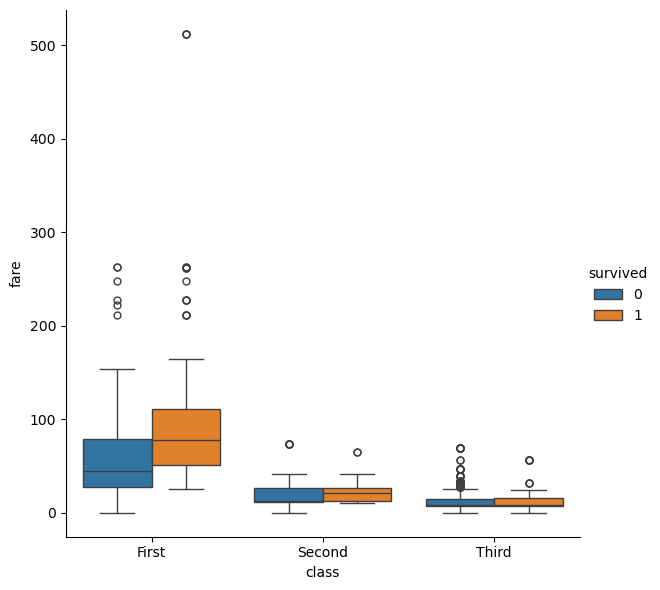

In [427]:
# Do a box plot with the help of catplot for fare distribution by class with respect to survived
sns.catplot( x='class', y='fare', hue='survived', kind='box', data=data, height=6, aspect=1 ) 

In [428]:
data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

Common Parameters in catplot:
x / y: The variables to plot.
hue: A categorical variable to group data by color.
kind: Type of plot (e.g., bar, box, strip).
height and aspect: Control the size of the plot.

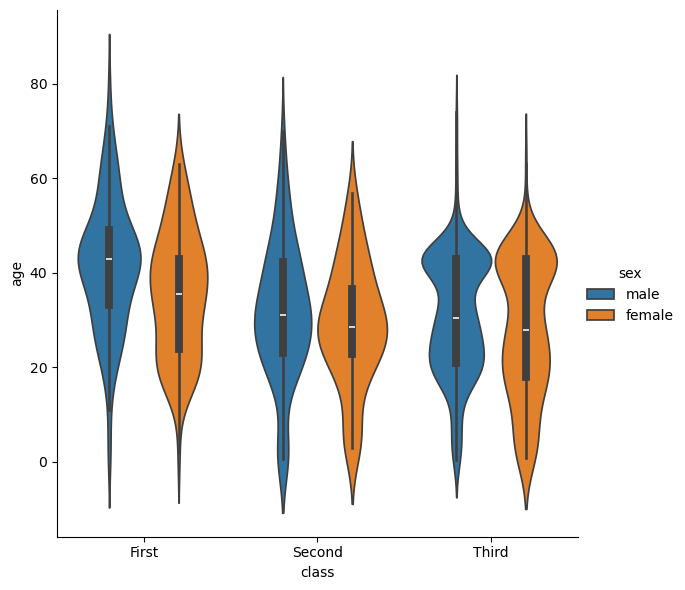

In [430]:
# Do a violin plot to reflect the age distribution by class and gender with the help of a categorical plot
sns.catplot( x='class', y='age', hue='sex', kind='violin', data=data, height=6, aspect=1 ) 

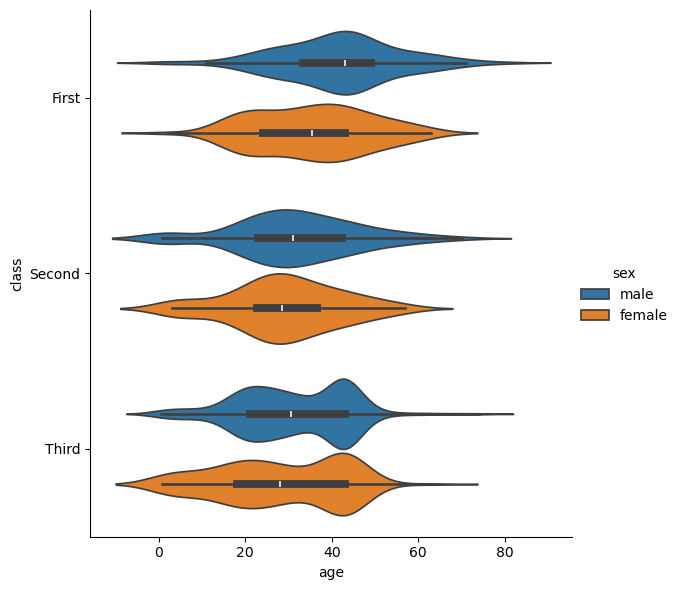

In [431]:
sns.catplot( x='age', y='class', hue='sex', kind='violin', data=data, height=6, aspect=1 ) 

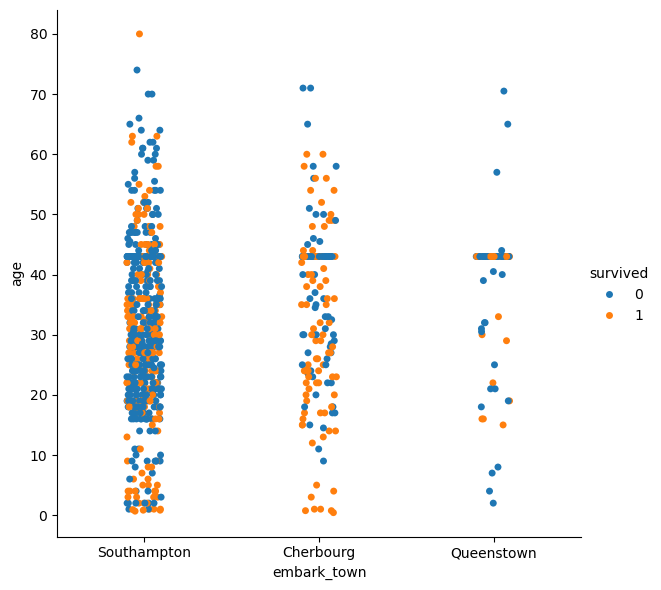

In [432]:
# Do a strip plot to reflect the age distribution by embarkation port
sns.catplot( x='embark_town', y='age', hue='survived', kind='strip', data=data, height=6, aspect=1 ) 

In [433]:
data.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sunilk\anaconda3\Lib\site-p

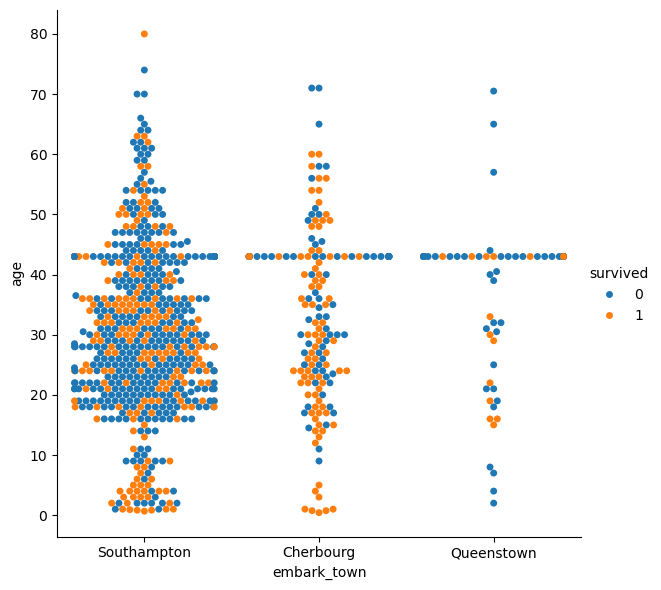

In [434]:
sns.catplot( x='embark_town', y='age', hue='survived', kind='swarm', data=data, height=6, aspect=1 )

In [435]:
data.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [436]:
data.age.value_counts()

age
43.00    182
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

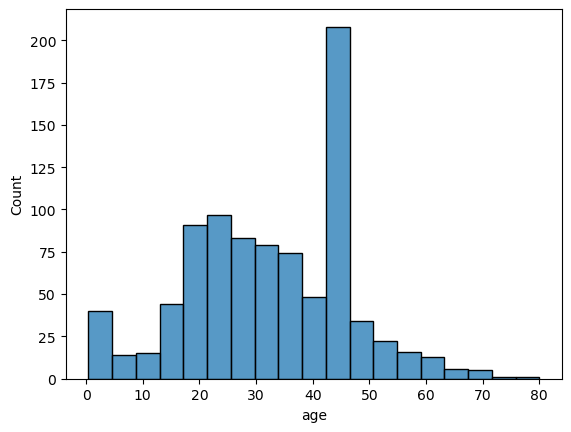

In [437]:
sns.histplot(x='age', data = data)

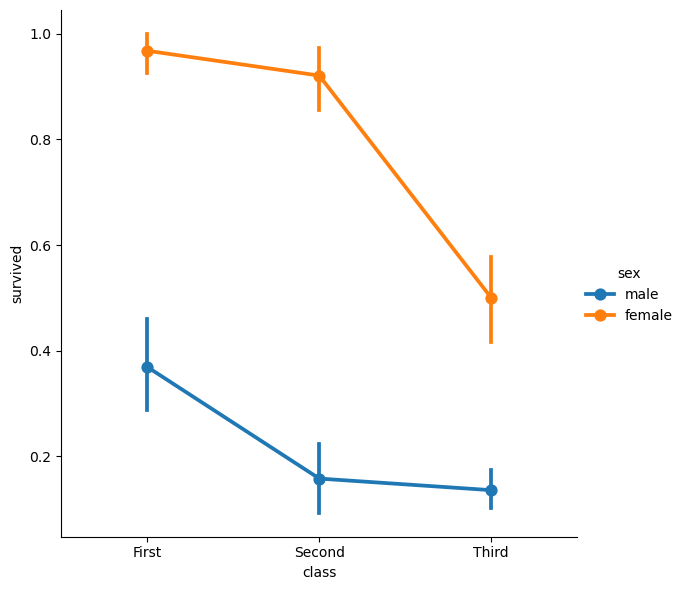

In [438]:
# Do a point plot to reflect survival rate by class and gender from our dataset
sns.catplot( x='class', y='survived', hue='sex', kind='point', data=data, height=6, aspect=1 )

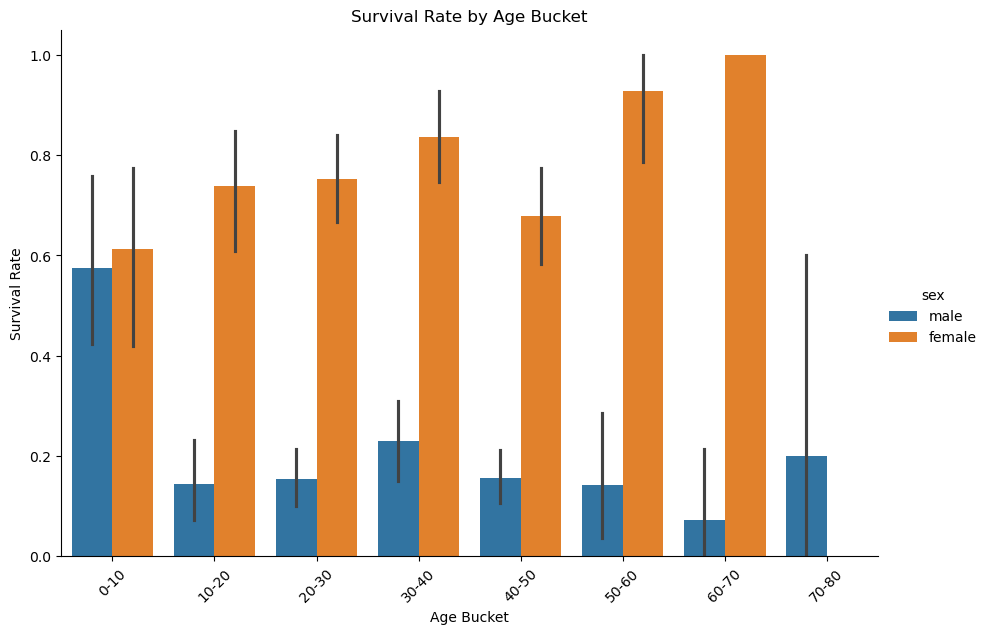

In [439]:
# Let us create age buckets (0 to 80 years) and then use a catplot to understand how survival rates vary across these age groups with respect to males and females)
import numpy as np
age_bins = np.linspace(0, 80, 9)
#Creating 9 equal bins between 0 and 80
data['age_bucket'] = pd.cut(data['age'], bins=age_bins, labels=[f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins)-1)])
sns.catplot( x='age_bucket', y='survived', hue = 'sex',kind='bar', data=data, height=6, aspect=1.5 )
plt.title('Survival Rate by Age Bucket') 
plt.xlabel('Age Bucket') 
plt.ylabel('Survival Rate') 
plt.xticks(rotation=45) 
plt.show()


In [440]:
np.std(data['age'])

14.036578669426808

In [441]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.341380,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.044462,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,43.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [442]:
# Encoding for sex, embarked and deck columns because other string categorical columns (class, who, adult_male,embark_town,alive, alone) are duplicated columns which are needed to drop
#sex - Label Encoding
# embarked - One hot encoding (label encoding is also ok)
#deck - One hot encoding


In [443]:
# Applying label encoding for sex column

In [444]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'] )


In [445]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bucket
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,other,Southampton,no,False,20-30
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30-40
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,other,Southampton,yes,True,20-30
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30-40
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,other,Southampton,no,True,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,other,Southampton,no,True,20-30
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10-20
888,0,3,0,43.0,1,2,23.4500,S,Third,woman,False,other,Southampton,no,False,40-50
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20-30


In [446]:
# Applying one hot encoding for embarked

In [447]:
# One-hot encoding for 'Embarked'
data = pd.get_dummies(data, columns=['embarked'], prefix='embarked')

In [448]:
data

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,age_bucket,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,Third,man,True,other,Southampton,no,False,20-30,False,False,True
1,1,1,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,30-40,True,False,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,other,Southampton,yes,True,20-30,False,False,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,30-40,False,False,True
4,0,3,1,35.0,0,0,8.0500,Third,man,True,other,Southampton,no,True,30-40,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,man,True,other,Southampton,no,True,20-30,False,False,True
887,1,1,0,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,10-20,False,False,True
888,0,3,0,43.0,1,2,23.4500,Third,woman,False,other,Southampton,no,False,40-50,False,False,True
889,1,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,20-30,True,False,False


In [449]:
data = pd.get_dummies(data, columns=['deck'], prefix='deck')

In [450]:
data

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_other
0,0,3,1,22.0,1,0,7.2500,Third,man,True,...,False,True,False,False,False,False,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,First,woman,False,...,False,False,False,False,True,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,...,False,True,False,False,False,False,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,...,False,True,False,False,True,False,False,False,False,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,man,True,...,False,True,False,False,False,False,False,False,False,True
887,1,1,0,19.0,0,0,30.0000,First,woman,False,...,False,True,False,True,False,False,False,False,False,False
888,0,3,0,43.0,1,2,23.4500,Third,woman,False,...,False,True,False,False,False,False,False,False,False,True
889,1,1,1,26.0,0,0,30.0000,First,man,True,...,False,False,False,False,True,False,False,False,False,False


In [451]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'embark_town', 'alive', 'alone', 'age_bucket',
       'embarked_C', 'embarked_Q', 'embarked_S', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_other'],
      dtype='object')

In [452]:
# Removing the redundant columns which are duplicated in the dataset -  fare, class, who, adult_male,embark_town, alive, alone
# Dropping any one column from embarked and deck after one hot encoding for dimension reductionality - 

data.drop(['fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'embarked_Q' , 'deck_other'], axis=1, inplace= True)


In [453]:
data.drop(['age_bucket'], axis=1, inplace= True)

In [454]:
data = data.astype(int) 

In [455]:
data

,survived,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22,1,0,0,1,0,0,0,0,0,0,0
1,1,1,0,38,1,0,1,0,0,0,1,0,0,0,0
2,1,3,0,26,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,35,1,0,0,1,0,0,1,0,0,0,0
4,0,3,1,35,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,0,1,0,0,0,0,0,0,0
887,1,1,0,19,0,0,0,1,0,1,0,0,0,0,0
888,0,3,0,43,1,2,0,1,0,0,0,0,0,0,0
889,1,1,1,26,0,0,1,0,0,0,1,0,0,0,0


In [456]:
# Dividing the dataset into x and y where x is the independent variable and y is the dependent
y = data['survived']
x = data.drop(columns = ['survived'])

In [457]:
x,y

(     pclass  sex  age  sibsp  parch  embarked_C  embarked_S  deck_A  deck_B  \
 0         3    1   22      1      0           0           1       0       0   
 1         1    0   38      1      0           1           0       0       0   
 2         3    0   26      0      0           0           1       0       0   
 3         1    0   35      1      0           0           1       0       0   
 4         3    1   35      0      0           0           1       0       0   
 ..      ...  ...  ...    ...    ...         ...         ...     ...     ...   
 886       2    1   27      0      0           0           1       0       0   
 887       1    0   19      0      0           0           1       0       1   
 888       3    0   43      1      2           0           1       0       0   
 889       1    1   26      0      0           1           0       0       0   
 890       3    1   32      0      0           0           0       0       0   
 
      deck_C  deck_D  deck_E  deck_F  

In [458]:
x

,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,3,1,22,1,0,0,1,0,0,0,0,0,0,0
1,1,0,38,1,0,1,0,0,0,1,0,0,0,0
2,3,0,26,0,0,0,1,0,0,0,0,0,0,0
3,1,0,35,1,0,0,1,0,0,1,0,0,0,0
4,3,1,35,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,0,1,0,0,0,0,0,0,0
887,1,0,19,0,0,0,1,0,1,0,0,0,0,0
888,3,0,43,1,2,0,1,0,0,0,0,0,0,0
889,1,1,26,0,0,1,0,0,0,1,0,0,0,0


In [459]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int32

In [623]:
# Feature scaling for the x variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

array([[1.    , 1.    , 0.275 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.475 , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.325 , ..., 0.    , 0.    , 0.    ],
       ...,
       [1.    , 0.    , 0.5375, ..., 0.    , 0.    , 0.    ],
       [0.    , 1.    , 0.325 , ..., 0.    , 0.    , 0.    ],
       [1.    , 1.    , 0.4   , ..., 0.    , 0.    , 0.    ]])

In [627]:
# changing the array to a data frame
scaled_x = pd.DataFrame(scaled_data, columns = x.columns)
scaled_x


,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,1.0,1.0,0.2750,0.125,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.4750,0.125,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.3250,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.4375,0.125,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.4375,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.3375,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.0,0.0,0.2375,0.000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.0,0.5375,0.125,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,1.0,0.3250,0.000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Before train test split we need to apply data balancing method on y to make the dataset balanced

In [630]:
# Splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.2,random_state=42)
#test_size = 0.2 parameter means that 20% of the data will be used for testing,
#random_state = 42, that the split is reproducible reproducible (we get the same/similar results each time we run the code with that particular number(specific seed)).

In [631]:
x_train, x_test, y_train, y_test

(     pclass  sex     age  sibsp     parch  embarked_C  embarked_S  deck_A  \
 331     0.0  1.0  0.5625  0.000  0.000000         0.0         1.0     0.0   
 733     0.5  1.0  0.2875  0.000  0.000000         0.0         1.0     0.0   
 382     1.0  1.0  0.4000  0.000  0.000000         0.0         1.0     0.0   
 704     1.0  1.0  0.3250  0.125  0.000000         0.0         1.0     0.0   
 813     1.0  0.0  0.0750  0.500  0.333333         0.0         1.0     0.0   
 ..      ...  ...     ...    ...       ...         ...         ...     ...   
 106     1.0  0.0  0.2625  0.000  0.000000         0.0         1.0     0.0   
 270     0.0  1.0  0.5375  0.000  0.000000         0.0         1.0     0.0   
 860     1.0  1.0  0.5125  0.250  0.000000         0.0         1.0     0.0   
 435     0.0  0.0  0.1750  0.125  0.333333         0.0         1.0     0.0   
 102     0.0  1.0  0.2625  0.000  0.166667         0.0         1.0     0.0   
 
      deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  
 331   

In [632]:
x_train

,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
331,0.0,1.0,0.5625,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
733,0.5,1.0,0.2875,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,1.0,1.0,0.4000,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,1.0,1.0,0.3250,0.125,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,1.0,0.0,0.0750,0.500,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.0,0.2625,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,0.0,1.0,0.5375,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,1.0,0.5125,0.250,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.0,0.0,0.1750,0.125,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [633]:
x_test

,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
709,1.0,1.0,0.5375,0.125,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.5,1.0,0.3875,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,1.0,1.0,0.2500,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720,0.5,0.0,0.0750,0.000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,1.0,0.0,0.1750,0.125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,1.0,0.2125,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,1.0,1.0,0.5375,0.000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1.0,0.0,0.4750,0.125,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.5,0.0,0.2125,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [634]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int32

In [635]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int32

In [636]:
# Applying logistic regression on the train data
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [637]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [638]:
x_test

,pclass,sex,age,sibsp,parch,embarked_C,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
709,1.0,1.0,0.5375,0.125,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.5,1.0,0.3875,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,1.0,1.0,0.2500,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720,0.5,0.0,0.0750,0.000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,1.0,0.0,0.1750,0.125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,1.0,0.2125,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,1.0,1.0,0.5375,0.000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1.0,0.0,0.4750,0.125,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.5,0.0,0.2125,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [639]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [640]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8044692737430168
Precision: 0.7671232876712328
Recall: 0.7567567567567568
F1 Score: 0.7619047619047619


In [641]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)

In [642]:
cm

array([[88, 17],
       [18, 56]], dtype=int64)

In [643]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died','Survived'])

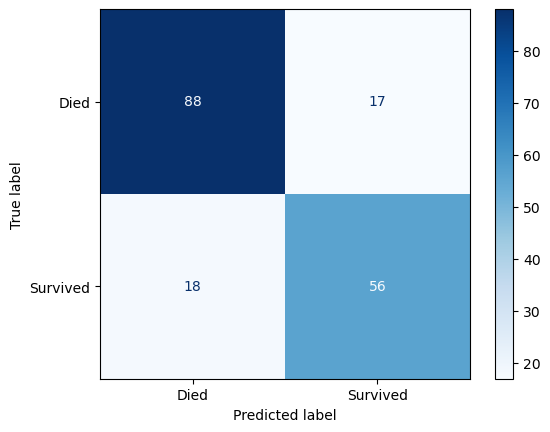

In [644]:
disp.plot(cmap='Blues')

In [645]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [646]:
train_score = model.score(x_train,y_train)

In [647]:
test_score = model.score(x_test,y_test)

In [648]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score #test_score will always be same as accuracy_score because accuracy of the model is checked with the help of test data

0.8044692737430168

In [649]:
train_score

0.7991573033707865

In [650]:
test_score

0.8044692737430168

In [651]:
# Till now logistic regression gives accuracy score of 81.56 % without any overfit or underfit. We have to apply other models to cross compare the results